**Final Project**

- Angga Fernando Putra, Dewi Maharani Dyah Pitaloka, Rian Pratama Putra
- Theme : Ecommerce Customer Churn

# Business Problem Understanding

**Latar Belakang**


Sebuah perusahaan yang bergerak dibidang e-commerce menghadapi berbagai tantangan untuk tetap mempertahankan atau bahkan meningkatkan revenue. Tantangan tersebut diantaranya adalah **meningkatkan retensi pelanggan** karena ditemukannya sejumlah pelanggan yang berhenti bertransaksi. Maka dari itu perusahaan ingin mengetahui pelanggan mana sajakah yang terindikasi akan berhenti bertransaksi serta memahami karakteristik pelanggan dalam bertransaksi. Sehingga perusahaan dapat membuat kebijakan yang tepat dan efisien untuk mengatasi tantangan yang ada.

**Rumusan Masalah :**

Permasalahan yang perlu diatasi adalah **bagaimana upaya perusahaan dalam meningkatkan retensi pelanggan secara efektif dan efisien**. **Adapun untuk meningkatkan retensi pelanggan dapat dilakukan dengan mencegah pelanggan untuk churn**. Hal tersebut menjadi penting mengingat perbandingan biaya yang diperlukan untuk mendapatkan **pelanggan baru adalah 5 kali lebih besar dibanding biaya yang dibutuhkan untuk mempertahankan pelanggan yang ada**. Namun bila seluruh sumber daya digunakan untuk semua pelanggan tanpa membedakan pelanggan yang akan churn atau tidak, maka penggunaan sumber daya tidak akan efektif dan efisien. Selain itu adapun **definisi dari pelanggan churn yang kita gunakan pada dataset ini adalah pelanggan yang sudah tidak melakukan login selama 30 hari berturut-turut**.

Target :

0 : Pelanggan yang masih login/tidak churn

1 : Pelanggan yang berhenti login/churn

**Goal :**

Untuk dapat menjawab permasalahan yang ada maka tujuan dari proyek ini yaitu : 

- Untuk **memahami karakteristik pelanggan yang berpotensi akan churn** sehingga kebijakan yang dibuat dapat lebih terarah. Adapun business questions atau pertanyaan bisnis yang perlu dijawab untuk dapat memahami karakteristik pelanggan tersebut diantaranya :

    1. Bagaimana karakteristik pelanggan berdasarkan **informasi personalnya** (jenis kota, status pernikahan, kelamin, jenis perangkat, jenis pembayaran, jenis produk favorit dan durasi penggunaan aplikasi/web aplikasi) ?

    2. Bagaimana karakteristik pelanggan berdasarkan **tingkat kepuasannya** (rating, keluhan) ?

    3. Bagaimana karakteristik pelanggan berdasarkan **riwayat transaksi & promosi** yang didapatkan (lamanya terdaftar, peningkatan jumlah pembelian, jumlah pembelian, penggunaan kupon, penerimaan cashback, jumlah hari setelah hari terakhir pembelian) ?

- Selain itu perusahaan juga ingin **memiliki kemampuan untuk memprediksi pelanggan yang akan churn** sehingga perusahaan khususnya tim marketing dapat membuat strategi untuk meningkatkan retensi pelanggan secara efektif dan efisien. **Adapun penggunaan alat prediksi akan digunakan pada pelanggan yang sudah tidak melakukan login selama 15 hari berturut-turut**.


**Pendekatan Analisis :**

Melakukan analisis data untuk menemukan **karakteristik pelanggan yang berpotensi akan churn**. Selanjutnya adalah **membuat model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi** kemungkinan pelanggan akan churn atau tidak.


**Metrik Evaluasi :**

Sebelum menentukan metrik evaluasi yang akan digunakan, sebaiknya perlu memperhatikan jenis eror yang dapat timbul dari pemodelan prediksi yaitu :

**False Positive**  : Pelanggan yang diprediksi akan berhenti melakukan transaksi tetapi kenyataannya tetap bertransaksi. Konsekuensinya adalah alokasi sumber daya yang tidak efektif dan efisien (contoh = pemberian diskon tidak tepat sasaran mengakibatkan sumber daya terbuang sia-sia).

**False Negative**  : Pelanggan yang diprediksi akan tetap melakukan transaksi tetapi kenyataannya berhenti bertransaksi. Konsekuensinya adalah kehilangan jumlah pelanggan yang akan berdampak pada penurunan revenue.

Karena fokus perusahaan adalah mempertahankan pelanggan secara efektif dan efisien dimana **meminimalisir false positive dan false negative sekecil mungkin tetapi lebih menitikberatkan pada false negative/recall** maka metrik yang digunakan adalah **f2-score**.

untuk gambaran kuantitatifnya secara umum adalah :
- Costumer Acquisition Cost (CAC) berdasarkan referensi https://firstpagesage.com sebesar 65 USD per orang<sup>[1]</sup>,
- Costumer Retention Cost (CRC) berdasarkan https://www.forbes.com bisa berkisar 20% dari CAC<sup>[2]</sup>, maka simulasi untuk CRC adalah :   20% dari 65 USD (CAC) = 13 USD per pelanggan.


Adapun pengertian dari tiap-tiap metrik evaluasi model klasifikasi yaitu :
- **F1-Score** : ukuran yang menggabungkan Precision dan Recall menjadi satu angka tunggal. Ini memberikan gambaran keseluruhan tentang kinerja model dalam mengklasifikasikan kelas positif, dengan mempertimbangkan baik false positives maupun false negatives.
- **F2-Score** : ukuran yang menggabungkan Precision dan Recall menjadi satu angka tunggal, dengan penekanan yang lebih besar pada recall
- **Recall** : merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. Ini berguna ketika Anda ingin meminimalkan false negatives.
- **Precision** : merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang diprediksi positf. Ini berguna ketika Anda ingin meminimalkan false positives.

# Data Understanding

Pada tahap awal yang perlu dilakukan adalah mengenali dan memahami karakteristik data sehingga kita dapat melihat gambaran data secara umum agar dapat memudahkan kita dalam tahap selanjutnya yaitu Data Cleaning.

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import missingno as msno

# statistics
from scipy.stats import normaltest, mannwhitneyu, chi2_contingency, randint, uniform

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection and Hyperparameter Tuning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, make_scorer, fbeta_score
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif, f_classif
from sklearn.svm import SVC

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

Dataset ini berisikan informasi terkait transaksi pelanggan di perusahaan E-Commerce ini. Ada 20 kolom di dalam dataset, yaitu :

| Attribute | Data Type | Description |
| --- | --- | --- |
| CustomerID | Int | Unique customer ID |
| Tenure | Float | Tenure of customer in organization |
| PreferredLoginDevice | Text | Preferred login device of customer |
| CityTier | Int | City tier |
| WarehouseToHome | Float | Distance in between warehouse to home of customer |
| PreferredPaymentMode | Text | Preferred payment method of customer |
| Gender | Text | Gender of customer |
| HourSpendOnApp | Float | Number of hours spend on mobile application or website |
| NumberOfDeviceRegistered | Int | Total number of deceives is registered on particular customer |
| PreferedOrderCat | Text | Preferred order category of customer in last month |
| SatisfactionScore | Int | Satisfactory score of customer on service |
| MaritalStatus | Text | Marital status of customer |
| NumberOfAddress | Int | Total number of added added on particular customer address |
| Complain | Int | Any complaint has been raised in last month |
| OrderAmountHikeFromlastYear | Float | Percentage increases in order from last year |
| CouponUsed | Float | Total number of coupon has been used in last month |
| OrderCount | Float | Total number of orders has been places in last month |
| DaySinceLastOrder | Float | Day Since last order by customer |
| CashbackAmount | Float | Average cashback in last month |
| Churn | Int | 0 – Stay with company services, 1 – Leaving company services |

In [2]:
# Load dataset
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28


In [3]:
# Menampilkan tipe data setiap kolom beserta jumlah kolom dan barisnya
print(f'Jumlah baris di dataset adalah : {df.shape[0]}\nJumlah kolom di dataset adalah : {df.shape[1]}\n')
df.info()

Jumlah baris di dataset adalah : 5630
Jumlah kolom di dataset adalah : 20

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  M

In [4]:
display(df.describe().T, df.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


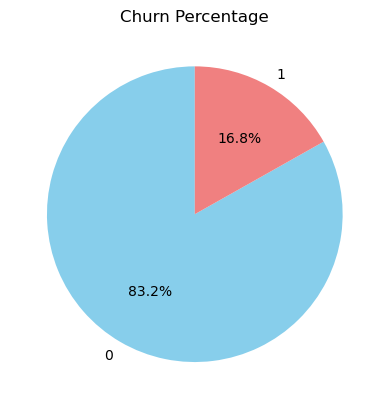

In [5]:
# Visualisasi sebaran jumlah churn vs non-churn
persentasi_churn = 100 * df['Churn'].value_counts() / len(df['Churn'])

plt.pie(persentasi_churn, labels=persentasi_churn.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Churn Percentage')
plt.show()

Berdasarkan pie chart di atas dapat dilihat bahwa dataset bersifat imbalance dimana yang tidak churn lebih banyak ketimbang yang churn.

In [6]:
# Menampilkan jumlah data unik setiap kolom
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['Kolom', 'Tipe', 'Data_kosong', 'Data_Kosong_%', 'Jumlah_Unik', 'Data_Unik_Sampel'],
                     data=listItem)

pd.set_option('display.max_colwidth', 80)
dfDesc

,Kolom,Tipe,Data_kosong,Data_Kosong_%,Jumlah_Unik,Data_Unik_Sampel
0,CustomerID,int64,0,0.00,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 50007, 50008, 50009, 50010, 50011..."
1,Churn,int64,0,0.00,2,"[1, 0]"
2,Tenure,float64,264,4.69,36,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 14.0, 8.0, 18.0, 5.0, 2.0, 30.0..."
3,PreferredLoginDevice,object,0,0.00,3,"[Mobile Phone, Phone, Computer]"
4,CityTier,int64,0,0.00,3,"[3, 1, 2]"
5,WarehouseToHome,float64,251,4.46,34,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, 31.0, 18.0, 13.0, 20.0, 29.0, ..."
6,PreferredPaymentMode,object,0,0.00,7,"[Debit Card, UPI, CC, Cash on Delivery, E wallet, COD, Credit Card]"
7,Gender,object,0,0.00,2,"[Female, Male]"
8,HourSpendOnApp,float64,255,4.53,6,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
9,NumberOfDeviceRegistered,int64,0,0.00,6,"[3, 4, 5, 2, 1, 6]"


Secara umum, terkait dataset dapat disimpulkan bahwa :

- dataset terdiri dari 20 kolom dan 5630 baris dan kolom CustomerID tidak akan digunakan dalam EDA maupun pembuatan model ML karena hanya berisikan data unik yang tidak memberikan informasi penting.
- dataset tidak seimbang (yang tidak churn lebih banyak).
- dataset memiliki missing value (akan di cek pada tahapan data cleaning) serta perlu dilakukan pengecekan lainnya seperti data outlier dan data duplikat.
- dataset mengandung elemen data redundan seperti **Cash on Delivery vs COD** dan **Credit Card vs CC** pada kolom **PreferredPaymentMode**.
- dataset mengandung elemen data redundan seperti **Mobile Phone vs Mobile** pada kolom **PreferedOrderCat**.
- dataset mengandung elemen data redundan seperti **Mobile Phone vs Phone** pada kolom **PreferredLoginDevice**.

# Data Cleaning

Tahapan selanjutnya adalah data cleaning. Data cleaning perlu dilakukan agar **data lebih bersih dari segala jenis kesalahan dengan meminimalisir sekecil mungkin kesalahan yang ada** sehingga dapat digunakan pada tahapan selanjutnya seperti EDA dan pembuatan model dengan hasil yang lebih baik. 

Sebelum dimulai tahapan data cleaning ada baiknya dilakukan visualisasi distribusi data numerikal pada dataset agar dapat membantu proses data cleaning.

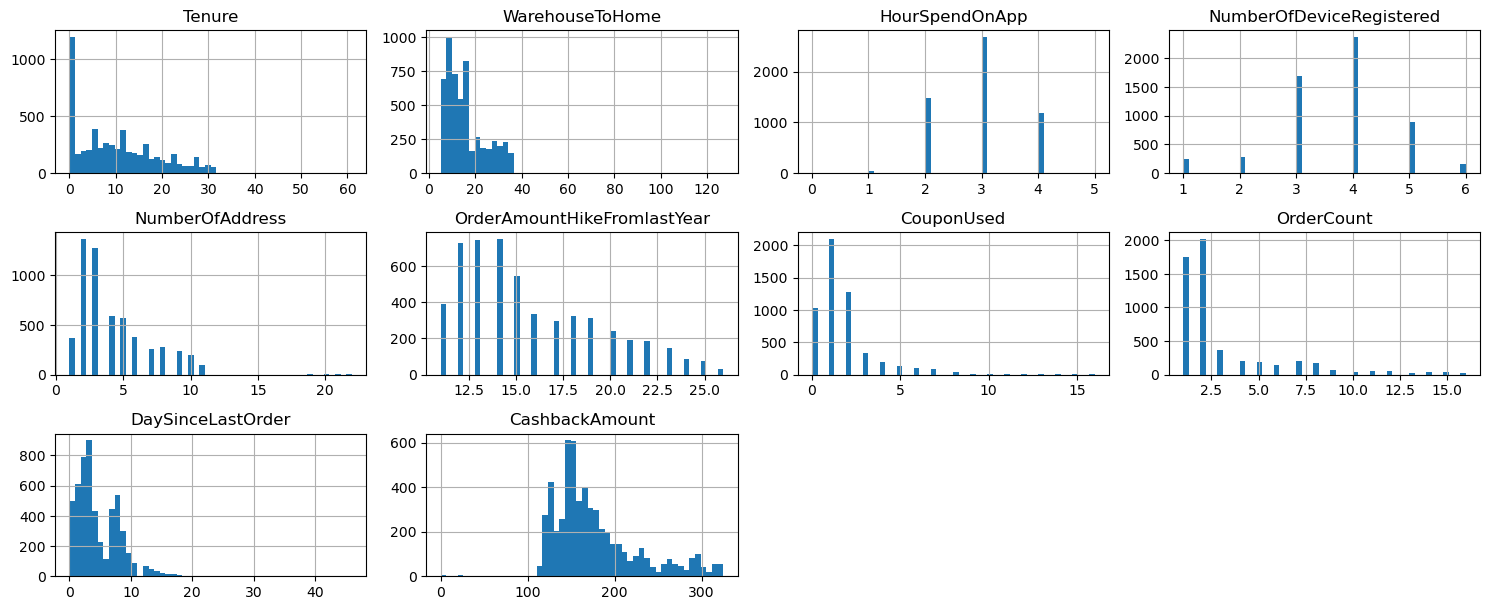

In [7]:
# Visualisasi distribusi data numerik
df_distribusi = df[['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear',
                    'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']]
plot_distribusi = df_distribusi.columns

fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(5,4), column=plot_distribusi)
plt.tight_layout()
plt.show()

**Dapat disimpulkan seluruh data numerikal tidak terdistribusi dengan normal, sehingga imputasi _missing data_ menggunakan _mean_ tidak dapat digunakan. Maka median akan digunakan bila imputasi diperlukan, agar tidak mempengaruhi distribusi data**.

## Hapus Kolom

Kolom yang akan dihapus yaitu **CustomerID** karena tidak akan digunakan untuk tahapan selanjutnya.

In [8]:
# Menghapus kolom CustomerID
df.drop(['CustomerID'] ,axis=1, inplace=True)
df.head(3)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28


## Data Redundan dan Outlier

Pada tahapan ini yang akan dilakukan adalah pengecekan elemen data redundan dan data outlier. Contoh elemen data redundan adalah data **'COD'** sama artinya dengan **'Cash on Delivery'** pada kolom/fitur **'PreferredPaymentMode'**. Data outlier adalah nilai yang jauh dari sebagian besar nilai dalam kumpulan data. 

### Data Redundan

Terdapat elemen data redundan pada beberapa kolom diantaranya :
1. kolom **'PreferredPaymentMode'** : data **'COD'** sama artinya dengan **'Cash on Delivery'** dan **'CC'** sama artinya dengan **'Credit Card'**

2. kolom **'PreferedOrderCat'** : data **'Mobile'** sama artinya dengan **'Mobile Phone'**

3. kolom **'PreferredLoginDevice'** : data **'Phone'** sama artinya dengan **'Mobile Phone'**

In [9]:
# Merubah data 'COD' menjadi 'Cash on Delivery' dan 'CC' menjadi 'Credit Card' pada kolom 'PreferredPaymentMode'
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('CC', 'Credit Card')
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

In [10]:
# Merubah data 'Mobile' menjadi 'Mobile Phone' pada kolom 'PreferedOrderCat'
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion',
       'Grocery'], dtype=object)

In [11]:
# Merubah data 'Phone' menjadi 'Mobile Phone' pada kolom 'PreferredLoginDevice'
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')
df['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Computer'], dtype=object)

### Data Outlier

Pada tahapan ini akan dilakukan pengecekan data outlier khusus untuk kolom numerik. Akan dilakukan pengecekan menggunakan visualisasi boxplot serta dicari tahu data outlier dan jumlahnya untuk dilakukan perbaikan. Apabila data outliernya masih masuk akal dengan persebaran data lainnya maka tidak akan dihapus namun apabila data outliernya termasuk kedalam data anomali maka ada kemungkinan untuk dihapus.

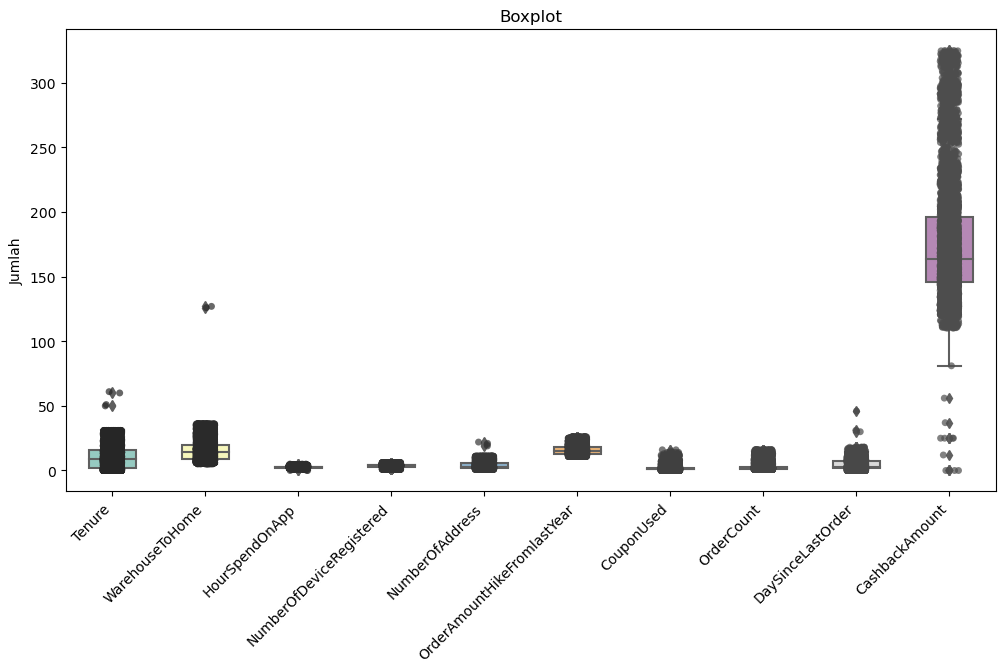

In [12]:
# Visualisasi data outlier menggunakan boxplot
kolom_boxplot = ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear',
                 'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[kolom_boxplot], width=0.5, palette="Set3")
sns.stripplot(data=df[kolom_boxplot], jitter=True, color=".3", marker="o", alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot')
plt.ylabel('Jumlah')
plt.show()

In [13]:
# Menghitung distribusi data outlier
list_BB = []
list_BA = []
jumlah_outlier_BB = []
jumlah_normal = []
jumlah_outlier_BA = []
percentage_outlier = []
outlier_unik = []

for column in kolom_boxplot: 
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25) # Q3 - Q1
    BB = df[column].quantile(0.25) - 1.5*IQR # Q1 - 1.5*IQR
    BA = df[column].quantile(0.75) + 1.5*IQR # Q3 - 1.5*IQR
    list_BB.append(BB)
    list_BA.append(BA)
    jumlah_outlier_BB.append(len(df[df[column]<BB]))
    jumlah_normal.append(len(df[(df[column]>=BB) & (df[column]<=BA)]))
    jumlah_outlier_BA.append(len(df[df[column]>BA]))
    percentage_outlier.append(round((len(df[df[column]<BB]) + len(df[df[column]>BA])) / len(df)  *100, 2)) 
    outlier_unik.append(df[(df[column] < BB) | (df[column] > BA)][column].unique())

outliers = pd.DataFrame({
    'Kolom' : kolom_boxplot,
    'BB' : list_BB,
    'BA' : list_BA,
    'Jmlh Outlier_BB' : jumlah_outlier_BB,
    'Jmlh non-Outlier' : jumlah_normal,
    'Jmlh Outlier_BA' : jumlah_outlier_BA,
    '% Outlier' : percentage_outlier,
    'Outlier unik' : outlier_unik
})

outliers

,Kolom,BB,BA,Jmlh Outlier_BB,Jmlh non-Outlier,Jmlh Outlier_BA,% Outlier,Outlier unik
0,Tenure,-19.00000,37.00000,0,5362,4,0.07,"[50.0, 60.0, 51.0, 61.0]"
1,WarehouseToHome,-7.50000,36.50000,0,5377,2,0.04,"[126.0, 127.0]"
2,HourSpendOnApp,0.50000,4.50000,3,5369,3,0.11,"[0.0, 5.0]"
3,NumberOfDeviceRegistered,1.50000,5.50000,235,5233,162,7.05,"[1, 6]"
4,NumberOfAddress,-4.00000,12.00000,0,5626,4,0.07,"[19, 21, 20, 22]"
5,OrderAmountHikeFromlastYear,5.50000,25.50000,0,5332,33,0.59,[26.0]
6,CouponUsed,-0.50000,3.50000,0,4745,629,11.17,"[4.0, 9.0, 6.0, 11.0, 7.0, 12.0, 10.0, 5.0, 13.0, 15.0, 8.0, 14.0, 16.0]"
7,OrderCount,-2.00000,6.00000,0,4669,703,12.49,"[15.0, 7.0, 9.0, 11.0, 12.0, 10.0, 8.0, 13.0, 14.0, 16.0]"
8,DaySinceLastOrder,-5.50000,14.50000,0,5261,62,1.10,"[15.0, 17.0, 16.0, 30.0, 46.0, 18.0, 31.0]"
9,CashbackAmount,69.83625,272.32625,11,5192,427,7.78,"[295.45, 299.26, 290.33, 287.22, 299.99, 0.0, 292.32, 295.17, 290.68, 292.02..."


**Kolom Tenure**

Untuk kolom tenure data uniknya memiliki rentang 0-31 dan 50,51,60,61 dimana outliernya adalah 50,51,60,61. Karena data outliernya terlihat anomali dan jumlahnya sedikit maka diputuskan untuk **dihapus** saja.

In [14]:
# Data unik kolom tenure
data_tenure = df['Tenure'].unique()
data_tenure.sort()
print(data_tenure)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 50. 51. 60. 61.
 nan]


**Kolom WarehouseToHome**

Untuk kolom WarehouseToHome data uniknya memiliki rentang 5-36 dan 126,127 dimana outliernya adalah 126 dan 127. Karena data outliernya terlihat anomali dan jumlahnya sedikit maka diputuskan untuk **dihapus** saja.

In [15]:
# Data unik kolom WarehouseToHome
data_WarehouseToHome = df['WarehouseToHome'].unique()
data_WarehouseToHome.sort()
print(data_WarehouseToHome)

[  5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.
  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.
  33.  34.  35.  36. 126. 127.  nan]


**Kolom HourSpendOnApp**

Untuk kolom HourSpendOnApp data uniknya memiliki rentang 0-5 dimana outliernya adalah 0 dan 5. Walaupun ditemukan data outlier namun karena datanya masih masuk akal dengan data lainnya maka diputuskan untuk **tidak dihapus**.

In [16]:
# Data unik kolom HourSpendOnApp
data_HourSpendOnApp = df['HourSpendOnApp'].unique()
data_HourSpendOnApp.sort()
print(data_HourSpendOnApp)

[ 0.  1.  2.  3.  4.  5. nan]


**Kolom NumberOfDeviceRegistered**

Untuk kolom NumberOfDeviceRegistered data uniknya memiliki rentang 1-6 dimana outliernya adalah 1 dan 6. Walaupun ditemukan data outlier namun karena datanya masih masuk akal dengan data lainnya maka diputuskan untuk **tidak dihapus**.

In [17]:
# Data unik kolom NumberOfDeviceRegistered
data_NumberOfDeviceRegistered = df['NumberOfDeviceRegistered'].unique()
data_NumberOfDeviceRegistered.sort()
print(data_NumberOfDeviceRegistered)

[1 2 3 4 5 6]


**Kolom NumberOfAddress**

Untuk kolom NumberOfAddress data uniknya memiliki rentang 1-11 dan 19-22 dimana outliernya adalah 19,20,21,22. Karena data pada kolom NumberOfAddress adalah data nomor rumah maka data outlier masih masuk akal dengan data lainnya maka diputuskan untuk **tidak dihapus**.

In [18]:
# Data unik kolom NumberOfAddress
data_NumberOfAddress = df['NumberOfAddress'].unique()
data_NumberOfAddress.sort()
print(data_NumberOfAddress)

[ 1  2  3  4  5  6  7  8  9 10 11 19 20 21 22]


**Kolom OrderAmountHikeFromlastYear**

Untuk kolom OrderAmountHikeFromlastYear data uniknya memiliki rentang 11-26 dimana outliernya adalah 26. Walaupun ditemukan data outlier namun karena datanya masih masuk akal dengan data lainnya maka diputuskan untuk **tidak dihapus**.

In [19]:
# Data unik kolom OrderAmountHikeFromlastYear
data_OrderAmountHikeFromlastYear = df['OrderAmountHikeFromlastYear'].unique()
data_OrderAmountHikeFromlastYear.sort()
print(data_OrderAmountHikeFromlastYear)

[11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. nan]


**Kolom CouponUsed**

Untuk kolom CouponUsed data uniknya memiliki rentang 0-16 dimana outliernya adalah 4,5,6,7,9,10,11,12,13. Walaupun ditemukan data outlier namun karena datanya masih masuk akal dengan data lainnya maka diputuskan untuk **tidak dihapus**.

In [20]:
# Data unik kolom CouponUsed
data_CouponUsed = df['CouponUsed'].unique()
data_CouponUsed.sort()
print(data_CouponUsed)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]


**Kolom OrderCount**

Untuk kolom OrderCount data uniknya memiliki rentang 1-16 dimana outliernya adalah 7,8,9,10,11,12,13,15. Walaupun ditemukan data outlier namun karena datanya masih masuk akal dengan data lainnya maka diputuskan untuk **tidak dihapus**.

In [21]:
# Data unik kolom OrderCount
data_OrderCount = df['OrderCount'].unique()
data_OrderCount.sort()
print(data_OrderCount)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]


**Kolom DaySinceLastOrder**

Untuk kolom DaySinceLastOrder data uniknya memiliki rentang 0-18 dan 30,31,46 dimana outliernya adalah 15,16,17,18,30,31,46. Walaupun ditemukan data outlier namun karena datanya masih masuk akal dengan data lainnya maka diputuskan untuk **tidak dihapus**.

In [22]:
# Data unik kolom DaySinceLastOrder
data_DaySinceLastOrder = df['DaySinceLastOrder'].unique()
data_DaySinceLastOrder.sort()
print(data_DaySinceLastOrder)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 30. 31. 46. nan]


**Kolom CashbackAmount**

Untuk kolom CashbackAmount karena data uniknya sangat variatif dan tidak ada tolak ukur yang pasti terkait cashback maka semua data dianggap masuk akal/bukan anomali. Selain itu karena jumlah datanya cukup banyak sekitar 8% maka diputuskan untuk **tidak dihapus**.

In [23]:
# Data unik kolom CashbackAmount
data_CashbackAmount = df['CashbackAmount'].unique()
data_CashbackAmount.sort()
print(data_CashbackAmount)

[  0.    12.    25.   ... 324.43 324.73 324.99]


**Maka dapat disimpulkan data outlier yang akan dihapus yaitu hanya pada kolom 'Tenure' dan kolom 'WarehouseToHome'**

In [24]:
# Menghapus data outlier untuk kolom tertentu
kolom_hapus_outlier = ['Tenure', 'WarehouseToHome']

for column in kolom_hapus_outlier :
    Q1_value = df[column].quantile(0.25)
    Q3_value = df[column].quantile(0.75)
    IQR_value = Q3_value - Q1_value
    BB_value = Q1_value - (1.5*IQR_value)
    BA_value = Q3_value + (1.5*IQR_value)

    hapus_outlier = df[ (df[column]<BB_value) | (df[column]>BA_value) ].index
    df.drop(hapus_outlier , inplace=True)

## Missing Value

Pada tahapan ini akan dilakukan pengecekan _missing value_ untuk setiap kolomnya. Akan dilakukan visualisasi terkait jumlah _missing value_ dan keberadaan _missing value_ di setiap kolom pada grafik visualisasi dibawah ini. Ada beberapa cara untuk mengatasi data yang mengandung _missing value_ yaitu dilakukan **penghapusan data atau pengisian data** tergantung dari kondisi data dan tujuan yang ingin dicapai.

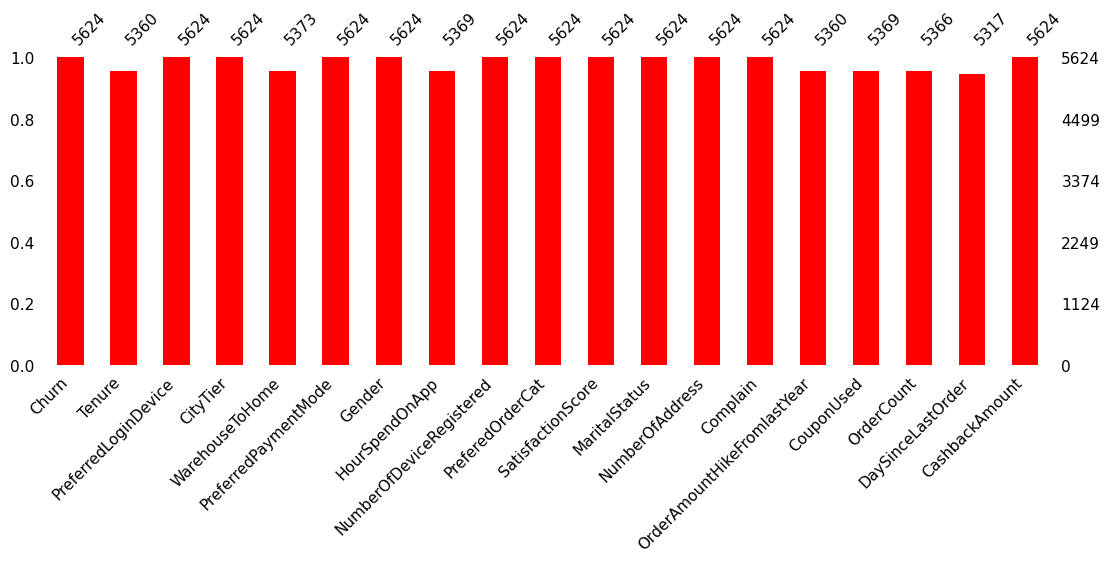

None

<Axes: >

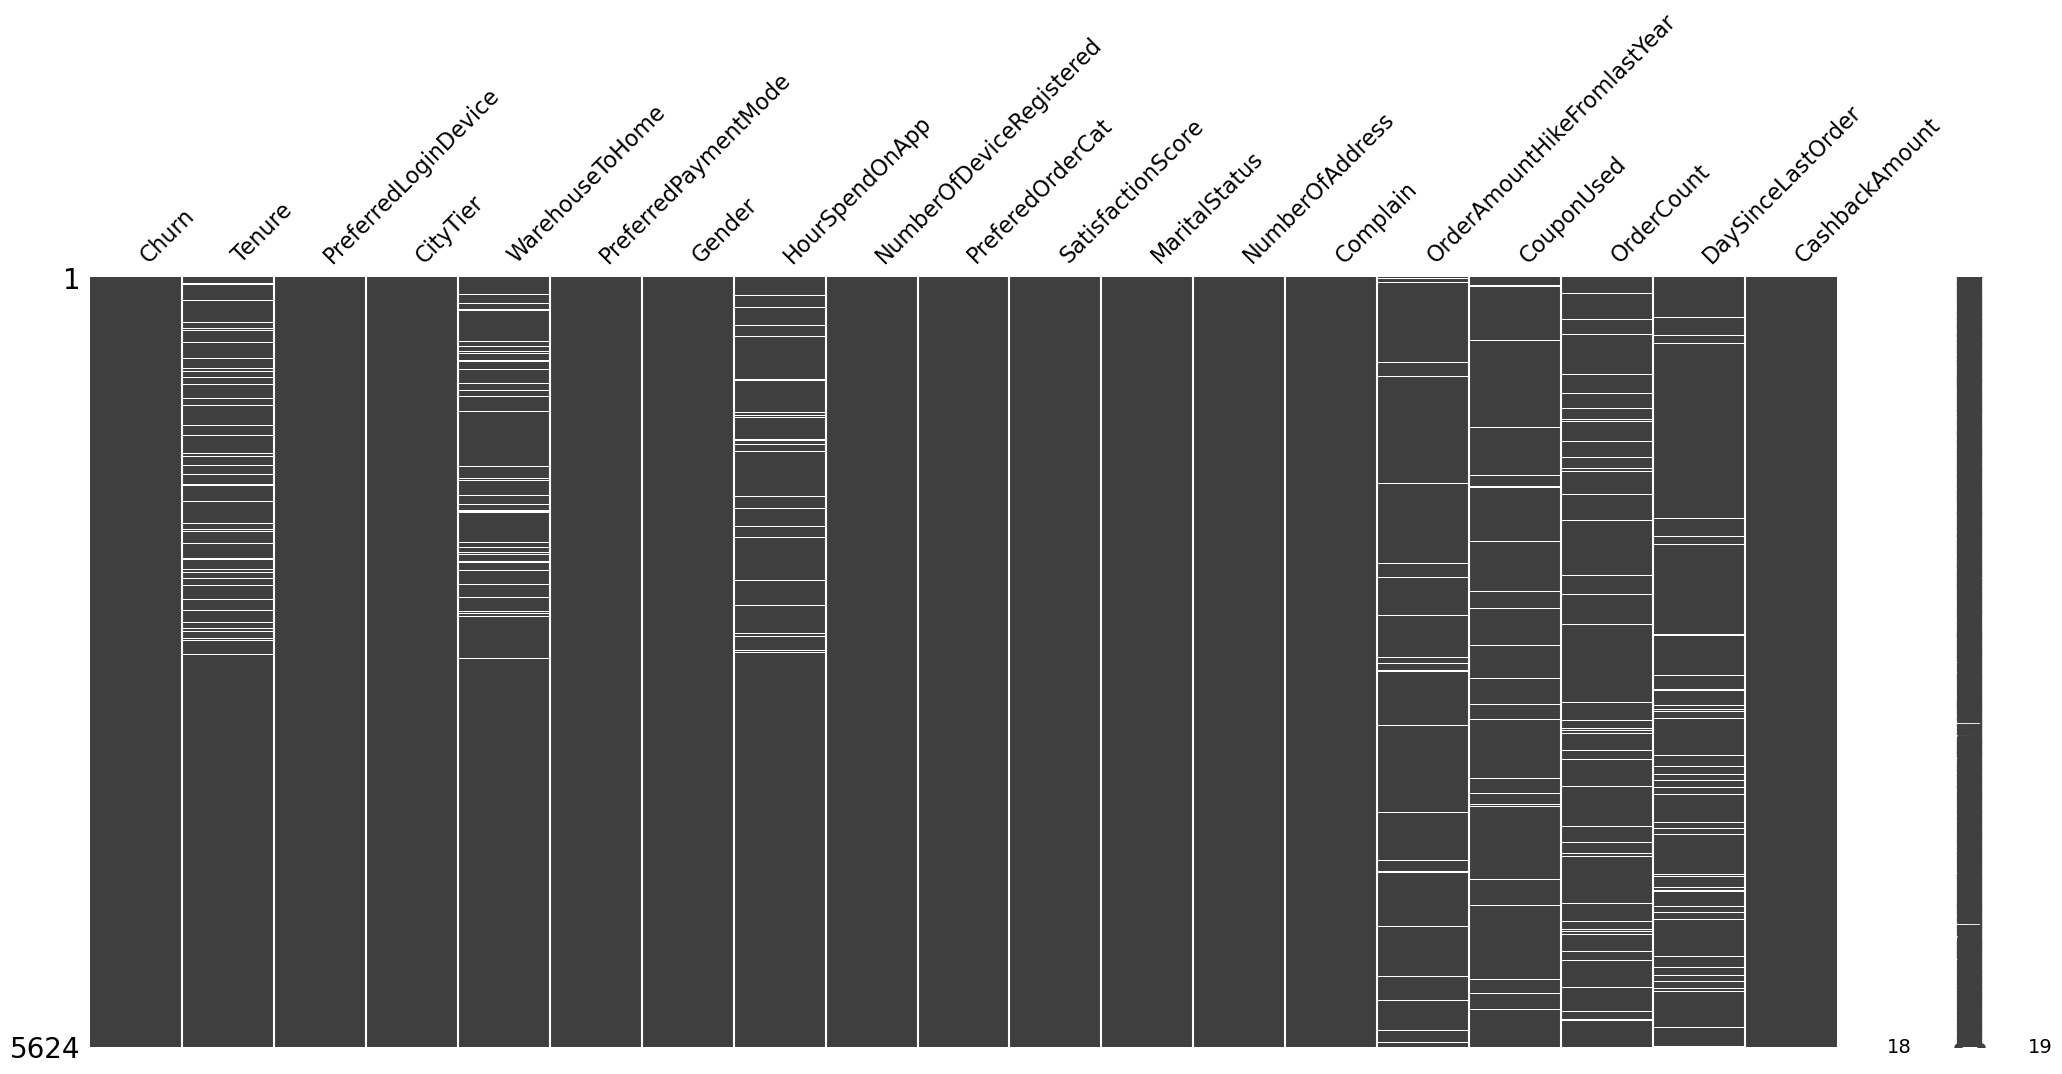

In [25]:
# Melakukan visualisasi terhadap missing value di semua kolom
msno.bar(df, color="red", figsize=(13, 4), fontsize=11)

display(plt.show(),msno.matrix(df))

In [26]:
# Persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Churn                          0.000000
Tenure                         4.694168
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.463016
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.534139
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.694168
CouponUsed                     4.534139
OrderCount                     4.587482
DaySinceLastOrder              5.458748
CashbackAmount                 0.000000
dtype: float64

Berdasarkan visualisasi diatas dapat dilihat bahwa data _missing value_ tersebar secara acak dibanyak kolom. Berdasarkan perhitungan persentasi _missing value_ pada setiap kolom berkisar 4-6% saja untuk masing-masing kolom. 

Data _missing value_ tersebar acak dibanyak kolom maka tidak dapat menggunakan metode penghapusan _missing value_ karena akan mengakibatkan berkurangnya data secara signifikan. Maka dari itu perlu dilakukan metode lain yaitu pengisian _missing value_. Metode pengisian _missing value_ dapat dilakukan dengan berbagai cara diantaranya **pengisian dengan value 0, pengisian dengan median value (data tidak terdistribusi normal) atau pengisian dengan mean value (data terdistribusi normal)**. Untuk saat ini data _missing value_ akan dibiarkan dan tetap dilanjutkan ke tahap EDA, setelah itu data _missing value_ akan diatasi pada tahap pre-processing.

## Data Duplikat

Tahapan selanjutnya adalah melakukan pengecekan data duplikat. Apabila data duplikat berjumlah sedikit dapat dilakukan penghapusan namun apabila data duplikat berjumlah banyak perlu diteliti lebih lanjut. Setelah tahap cleaning selesei perlu dilakukan sorting ulang terhadap data sehingga data dapat lebih rapih.

In [27]:
# Menampilkan jumlah data duplikat
duplikat = df.duplicated().sum()
persentasi_duplikat = (df.duplicated().sum() / len(df)) * 100
print(f'Jumlah duplikat = {duplikat}, Persentasi duplikat = {persentasi_duplikat}')

Jumlah duplikat = 557, Persentasi duplikat = 9.90398293029872


In [28]:
# menampilkan contoh data duplikat
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(6)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1045,0,0.0,Computer,1,NaN,Credit Card,Male,2.0,3,Mobile Phone,1,Single,3,0,13.0,0.0,1.0,2.0,125.80
2515,0,0.0,Computer,1,NaN,Credit Card,Male,2.0,3,Mobile Phone,1,Single,3,0,13.0,0.0,1.0,2.0,125.80
39,0,0.0,Computer,1,NaN,Credit Card,Male,3.0,4,Mobile Phone,3,Married,2,1,15.0,0.0,1.0,1.0,125.66
1509,0,0.0,Computer,1,NaN,Credit Card,Male,3.0,4,Mobile Phone,3,Married,2,1,15.0,0.0,1.0,1.0,125.66
1192,0,0.0,Computer,1,NaN,Debit Card,Female,2.0,3,Mobile Phone,1,Single,1,1,14.0,1.0,1.0,2.0,123.79
2662,0,0.0,Computer,1,NaN,Debit Card,Female,2.0,3,Mobile Phone,1,Single,1,1,14.0,1.0,1.0,2.0,123.79


In [29]:
# menghapus data duplikat
df.drop_duplicates(inplace=True) # data duplikat di hapus karena jumlahnya sedikit yaitu 9.94%

# reset index untuk memperbaiki index yang hilang karena proses penghapusan data
df.reset_index(drop=True, inplace=True)

# pengecekan kembali data duplikat
df.duplicated().sum()

0

Setelah selesai melakukan tahapan data cleaning, tahapan selanjutnya adalah data analysis.

In [30]:
# Saving data untuk keperluan EDA dan Modelling
df.to_csv('final_project_data_cleaned.csv', index=False)

# Exploratory Data Analysis

Setelah melakukan data cleaning tahapan selanjutnya adalah melakukan Exploratory Data Analysis (EDA). EDA berfungsi untuk menghasilkan insight yang bermanfaat yang nantinya akan digunakan untuk membuat rekomendasi secara nyata.

Dalam proyek ini EDA dibagi menjadi 2 tahapan besar yaitu **distribusi fitur data** dan **analisis fitur data vs target data**.

## Distribusi Data

Pada tahapan ini akan dilakukan visualisasi terhadap data numerik dan kategorik untuk melihat pola distribusinya secara umum.

### Distribusi Data Numerik

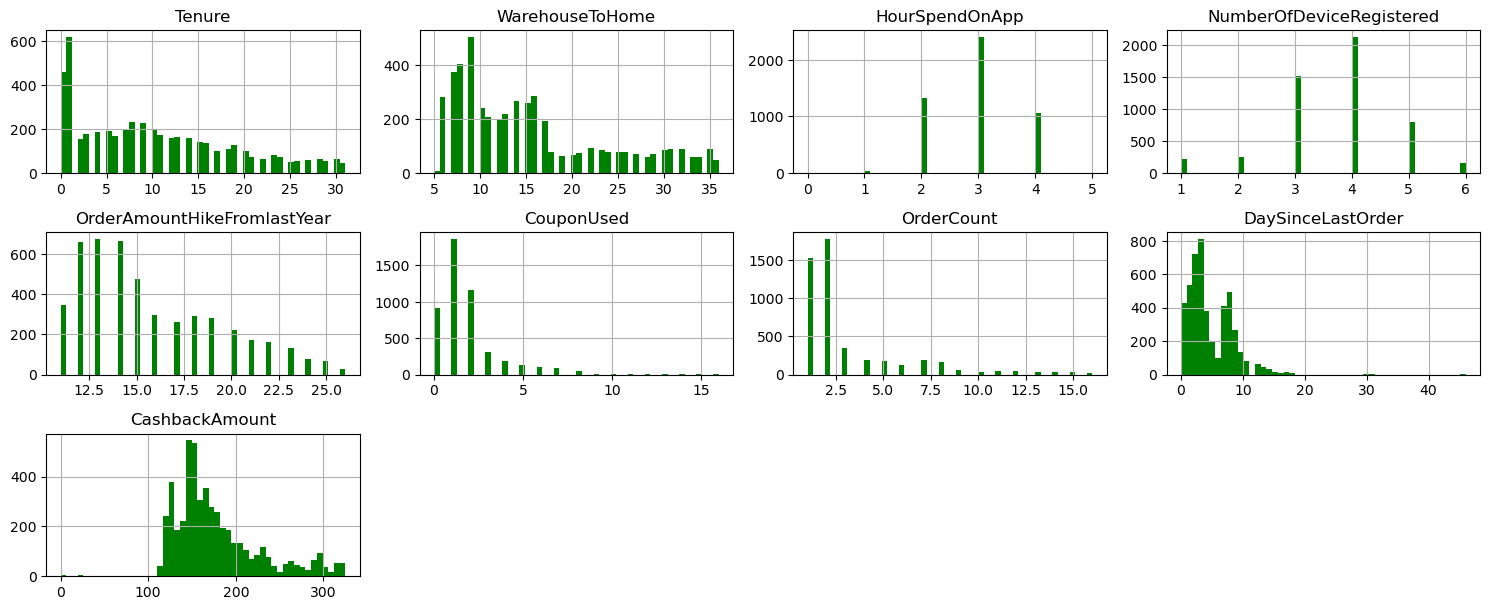

In [31]:
# Melihat distribusi data numerik
df_distribusi = df[['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','OrderAmountHikeFromlastYear',
                    'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']]
plot_distribusi = df_distribusi.columns

fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(5,4), column=plot_distribusi, color='green')
plt.tight_layout()
plt.show()

dari grafik-grafik diatas kita mendapatkan kesimpulan berupa :

- Berdasarkan tenure-nya, mayoritas pelanggan memiliki **tenure yang rendah dengan rentang 0-15 bulan**,
- Berdasarkan jarak antara gudang dengan rumah pelanggan, mayoritas pelanggan adalah yang memiliki **jarak yang dekat dengan rentang 6-18 km**,
- Berdasarkan durasi penggunaan aplikasi, mayoritas pelanggan menghabiskan waktu dalam penggunaan aplikasi sekitar **3 jam**,
- Berdasarkan jumlah perangkat yang terdaftar, mayoritas pelanggan adalah yang menggunakan **4 perangkat** yang berbeda,
- Berdasarkan persentase peningkatan pembelian produk, pelanggan mayoritas adalah pelanggan yang memiliki **persentase kenaikan jumlah pembeliannya (dari tahun sebelumnya) pada kisaran 10-15%**,
- Berdasarkan penggunaan kupon belanja, pelanggan mayoritas adalah pelanggan yang **sedikit menggunakan kupon yaitu sekitar 0-5 kupon**,
- Berdasarkan jumlah pembelian, pelanggan mayoritas adalah pelanggan yang memiliki jumlah **transaksi pembelian yang rendah yaitu sekitar 1-5 transaksi pembelian**,
- Berdasarkan jumlah hari setelah hari terakhir pembelian, pelanggan mayoritas adalah pelanggan yang terindikasi rutin melakukan transaksi dengan jarak **0-10 hari sejak terakhir melakukan transaksi pembelian** (bila diasumsikan dimana kondisi yang sama berulang untuk periode transaksi-transaksi sebelumnya),
- Berdasarkan cashback, pelanggan mayoritas adalah pelanggan yang sering melakukan transaksi dengan benefit cashback dengan rentang **cashback berkisar 120USD - 200USD**.

### Distribusi Data Kategorik

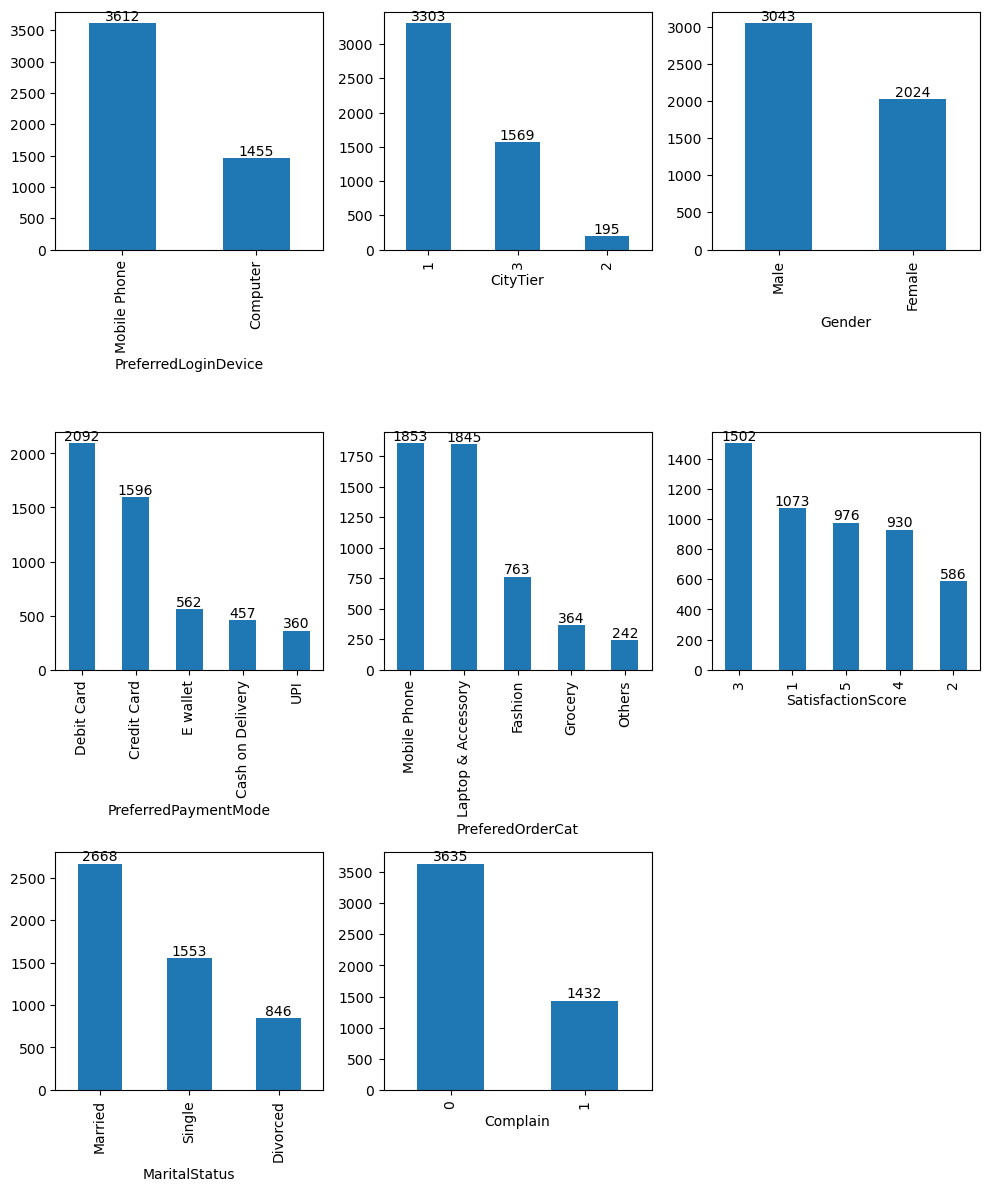

In [32]:
count = 0
fig = plt.figure(figsize=(10,12))

for i in df[['PreferredLoginDevice','CityTier','Gender','PreferredPaymentMode','PreferedOrderCat','SatisfactionScore', 'MaritalStatus','Complain']] :
    count += 1
    ax = plt.subplot(3, 3, count)
    df[i].value_counts().plot(kind='bar', ax=ax)
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
fig.tight_layout()
plt.show()

dari grafik-grafik diatas kita mendapatkan kesimpulan berupa :

- Jumlah pelanggan yang login menggunakan **mobile phone** lebih banyak sekitar **150%** dibandingkan dengan yang menggunakan computer,
- Jumlah pelanggan yang berlokasi di city **tier 1** lebih banyak dibandingkan dengan pelanggan yang berlokasi di city tier 2 dan 3 dengan komposisi sekitar **67%** dari **total seluruh data**,
- Jumlah pelanggan **pria** lebih banyak sekitar **50%** dibanding pelanggan wanita,
- Jumlah tipe pembayaran paling banyak yaitu **debit card** sekitar **41%** dan **credit card** sekitar **31%** dari **total seluruh data**,
- Jumlah kategori produk terjual paling banyak yaitu **mobile phone** sekitar **37%** dan **laptop & accessory** sekitar **36%** dari **total seluruh data** dimana kedua produk tersebut adalah termasuk kedalam kategori elektronik,
- Dengan asumsi score 1 adalah paling buruk dan score 5 adalah paling baik pada data SatisfactionScore maka pelanggan paling banyak adalah pelanggan yang memberikan rating **score 3** dengan komposisi sebesar **29%** dari **total seluruh data**.
- Pelanggan yang sudah **menikah** adalah pelanggan terbanyak dengan komposisi **51%** dari **total seluruh data**, sisanya adalah pelanggan belum menikah dan telah bercerai.
- Pelanggan terbanyak adalah pelanggan yang **belum pernah complain** yaitu sekitar **71%** dari **total seluruh data**, sisanya adalah pelanggan yang pernah melakukan complain.

## Fitur Data vs Target Data

Pada tahapan ini akan dilakukan visualisasi antara fitur-fitur yang ada terhadap churn untuk melihat seberapa besar pengaruh fitur tersebut terhadap keputusan untuk churn. Selain itu diperlihatkan juga visualisasi antar fitur untuk melihat pola distribusinya.

### Analisis Data Informasi Personal Pelanggan

**'CityTier' vs 'Churn'**

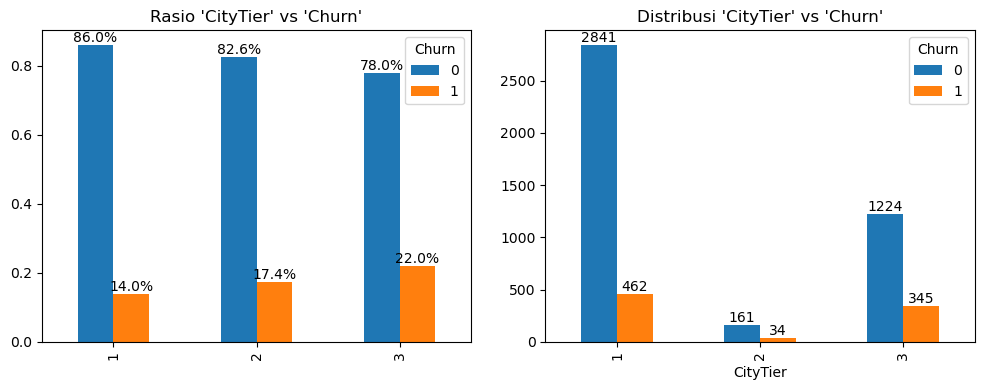

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={"width_ratios": [1, 1]})
                   
# Plot rasio CityTier vs churn
ax1.set_title("Rasio 'CityTier' vs 'Churn'", color="black")
pd.crosstab(df['CityTier'], df['Churn'], normalize=0).plot(kind='bar', ax=ax1)
ax1.set(xlabel="")
for p in ax1.patches:
    ax1.annotate(f"{p.get_height()*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
    
# Plot distribusi CityTier vs churn
ax2.set_title("Distribusi 'CityTier' vs 'Churn'", color="black")
pd.crosstab(df['CityTier'], df['Churn']).plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.subplots_adjust(wspace=10)
plt.tight_layout()
plt.show()

Pada grafik distribusi diatas dapat dilihat bahwa pelanggan terbanyak yaitu pelanggan yang berada dilokasi kota-kota yang masuk kedalam city tier 1. Namun **secara rasio pelanggan yang berlokasi di city tier 3 (pelanggan terbanyak ke-2 setelah city tier 1) adalah pelanggan yang lebih cenderung akan churn**. Selanjutnya mari kita lihat kaitannya antara city tier dengan fitur lain seperti PreferredPaymentMode, PreferedOrderCat.

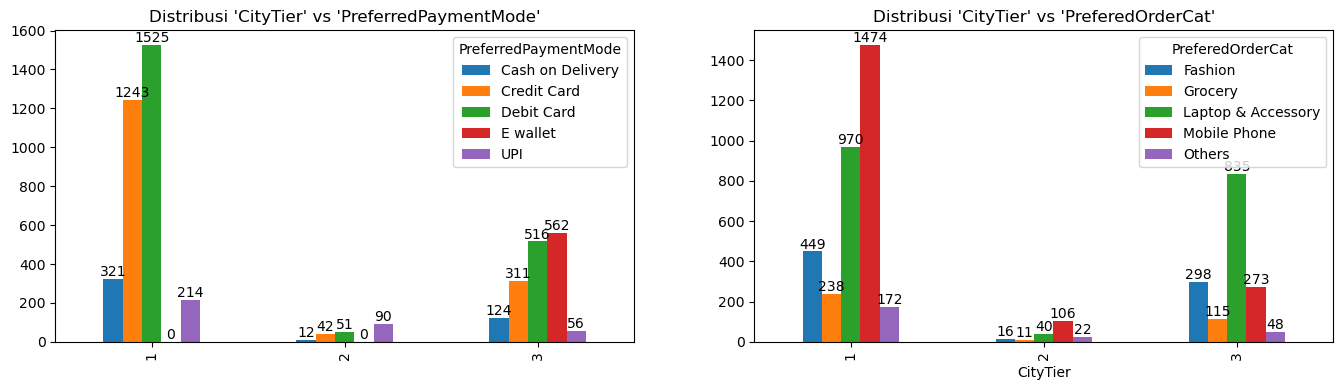

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={"width_ratios": [1, 1]})
                   
# Plot rasio CityTier vs PreferredPaymentMode
ax1.set_title("Distribusi 'CityTier' vs 'PreferredPaymentMode'", color="black")
pd.crosstab(df['CityTier'], df[ (df['CityTier']==1) | (df['CityTier']==2) | (df['CityTier']==3) ]['PreferredPaymentMode']).plot(kind='bar', ax=ax1)
ax1.set(xlabel="")
for p in ax1.patches:
    ax1.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
    
# Plot distribusi CityTier vs PreferedOrderCat
ax2.set_title("Distribusi 'CityTier' vs 'PreferedOrderCat'", color="black")
pd.crosstab(df['CityTier'], df[ (df['CityTier']==1) | (df['CityTier']==2) | (df['CityTier']==3) ]['PreferedOrderCat']).plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.subplots_adjust(wspace=10)
plt.tight_layout()
plt.show()

**insight :**

Dapat dilihat untuk **city tier 3 yang memiliki rasio churn paling tinggi** dimana jenis pembayaran terbanyak yaitu menggunakan sistem E-Wallet dan jenis produk terjual terbanyak yaitu Laptop & Accessory. Saran yang dapat diberikan untuk mengatasi churn yang tinggi pada City Tier 3 adalah **meluncurkan program loyalitas yang menawarkan insentif khusus atau diskon untuk pelanggan di kota ini, seperti memberikan poin loyalitas tambahan atau voucher untuk setiap pembelian yang dapat ditukar dengan barang atau layanan khususnya pada produk yang cenderung diminati seperti produk Laptop & Accessory**. Selain itu dapat juga **menawarkan penggabungan promosi apabila menggunakan sistem pembayaran E-Wallet** mengingat sistem pembayaran ini adalah yang paling diminati pada City Tier 3.

**'Gender' vs 'Churn'**

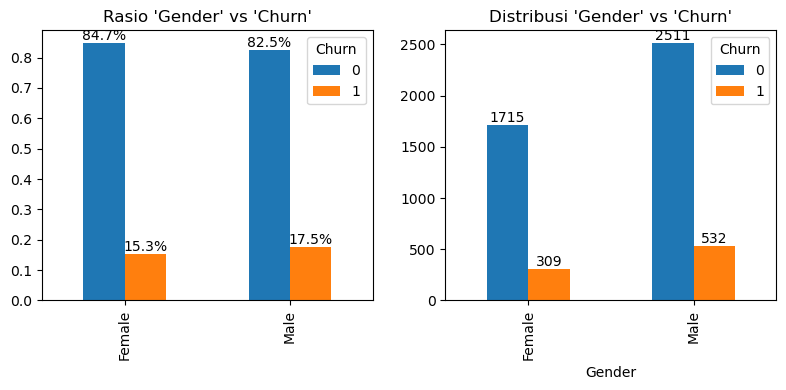

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={"width_ratios": [1, 1]})
                   
# Plot rasio Gender vs churn
ax1.set_title("Rasio 'Gender' vs 'Churn'", color="black")
pd.crosstab(df['Gender'], df['Churn'], normalize=0).plot(kind='bar', ax=ax1)
ax1.set(xlabel="")
for p in ax1.patches:
    ax1.annotate(f"{p.get_height()*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
    
# Plot distribusi Gender vs churn
ax2.set_title("Distribusi 'Gender' vs 'Churn'", color="black")
pd.crosstab(df['Gender'], df['Churn']).plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.subplots_adjust(wspace=10)
plt.tight_layout()
plt.show()

**insight :**

Tidak ada perbedaan yang signifikan antara pelanggan pria maupun pelanggan wanita terhadap keputusan untuk churn.

**'MaritalStatus' vs 'Churn'**

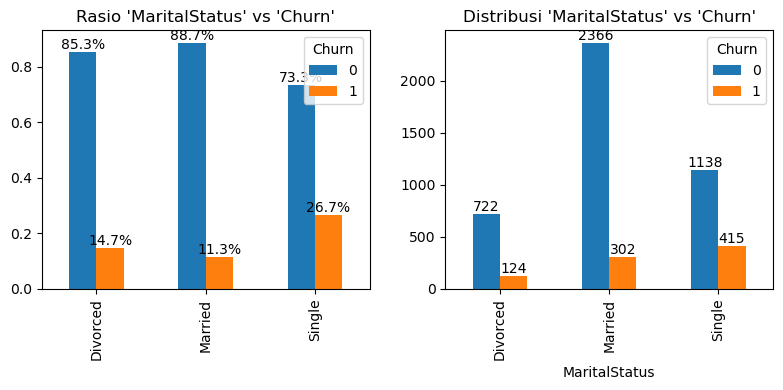

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={"width_ratios": [1, 1]})
                   
# Plot rasio MaritalStatus vs churn
ax1.set_title("Rasio 'MaritalStatus' vs 'Churn'", color="black")
pd.crosstab(df['MaritalStatus'], df['Churn'], normalize=0).plot(kind='bar', ax=ax1)
ax1.set(xlabel="")
for p in ax1.patches:
    ax1.annotate(f"{p.get_height()*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
    
# Plot distribusi MaritalStatus vs churn
ax2.set_title("Distribusi 'MaritalStatus' vs 'Churn'", color="black")
pd.crosstab(df['MaritalStatus'], df['Churn']).plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.subplots_adjust(wspace=10)
plt.tight_layout()
plt.show()

**insight :**

Pelanggan terbanyak adalah pelanggan yang sudah menikah. Hal ini cukup masuk akal karena pelanggan yang sudah menikah cenderung memiliki kebutuhan lebih besar dibandingkan dengan pelanggan yang berstatus lajang atau sudah bercerai. Secara rasio **pelanggan berstatus lajang lebih cenderung akan churn**. Saran yang dapat diberikan adalah sebaiknya **fokus terhadap pelanggan berstatus lajang dimana merupakan pelanggan terbanyak urutan ke-2 seperti membuat program 'single day' dimana diadakan bazzar dan promo besar-besar untuk hari tertentu apabila membeli produk tertentu secara satuan**. Selain itu dapat dibangun kemitraan dengan merek atau layanan yang berkaitan dengan gaya hidup lajang, seperti promosi terkait layanan gym.

**'PreferredLoginDevice' vs 'Churn'**

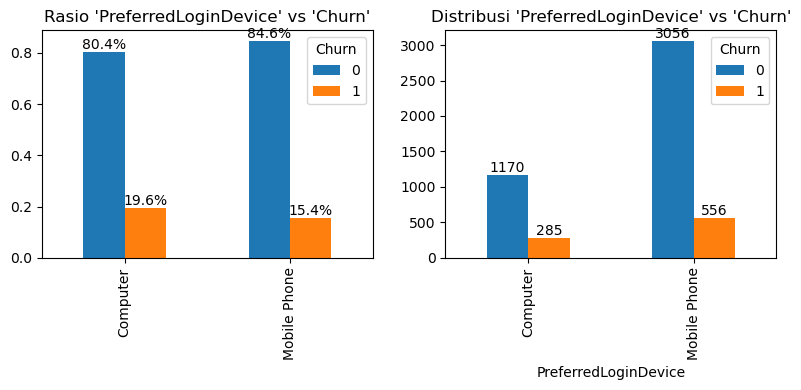

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={"width_ratios": [1, 1]})
                   
# Plot rasio 'PreferredLoginDevice' vs churn
ax1.set_title("Rasio 'PreferredLoginDevice' vs 'Churn'", color="black")
pd.crosstab(df['PreferredLoginDevice'], df['Churn'], normalize=0).plot(kind='bar', ax=ax1)
ax1.set(xlabel="")
for p in ax1.patches:
    ax1.annotate(f"{p.get_height()*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
    
# Plot distribusi 'PreferredLoginDevice' vs churn
ax2.set_title("Distribusi 'PreferredLoginDevice' vs 'Churn'", color="black")
pd.crosstab(df['PreferredLoginDevice'], df['Churn']).plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.subplots_adjust(wspace=10)
plt.tight_layout()
plt.show()

**insight :**

Pelanggan yang paling banyak adalah pelanggan yang berbelanja melalui aplikasi mobile phone. Secara rasio **pelanggan yang lebih cenderung akan churn adalah pelanggan yang berbelanja melalui web-aplikasi di komputer/pc**. Rekomendasi yang dapat diberikan yaitu **melakukan survey lebih lanjut untuk web-aplikasi apakah terdapat masalah** UI/UX seperti kemungkinan tampilan yang tidak ramah, kerumitan dalam penggunaan, akses yang sulit dibuka ataupun masalah lainnya yang membuat pelanggan kurang berminat. **Selanjutnya dilakukan perbaikan terkait akses dan atau sistem web-aplikasi sehingga dapat meningkatkan minat pelanggan**.

**'PreferredPaymentMode' vs 'Churn'**

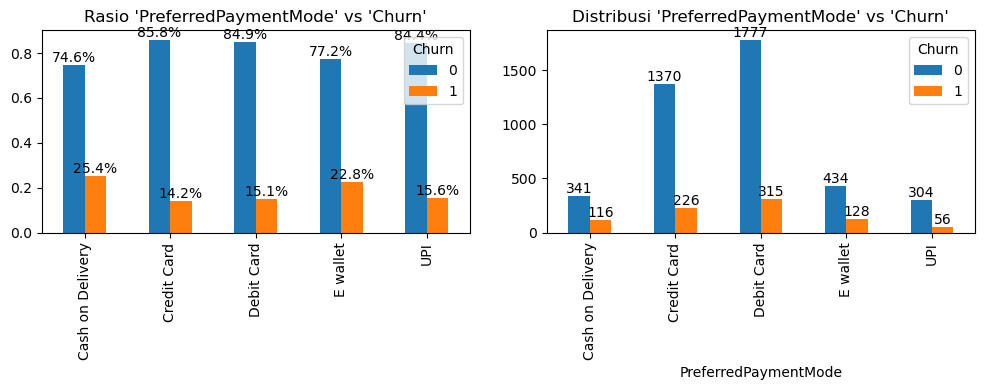

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={"width_ratios": [1, 1]})
                   
# Plot rasio 'PreferredPaymentMode' vs churn
ax1.set_title("Rasio 'PreferredPaymentMode' vs 'Churn'", color="black")
pd.crosstab(df['PreferredPaymentMode'], df['Churn'], normalize=0).plot(kind='bar', ax=ax1)
ax1.set(xlabel="")
for p in ax1.patches:
    ax1.annotate(f"{p.get_height()*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
    
# Plot distribusi 'PreferredPaymentMode' vs churn
ax2.set_title("Distribusi 'PreferredPaymentMode' vs 'Churn'", color="black")
pd.crosstab(df['PreferredPaymentMode'], df['Churn']).plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.subplots_adjust(wspace=10)
plt.tight_layout()
plt.show()

**insight :**

Pelanggan paling banyak adalah pelanggan dengan jenis pembayaran debit card dan credit card. Secara rasio **pelanggan yang lebih cenderung akan churn adalah pelanggan dengan jenis pembayaran COD**. hal ini mungkin diakibatkan karena transaksi dengan COD terindikasi bermasalah. Rekomendasi yang dapat diberikan **perlu diadakan survey lebih lanjut terkait pembayaran dengan metode ini untuk monitoring dan evaluasi lalu dilakukan tindaklanjut berupa perbaikan sistem.**

**'PreferedOrderCat' vs 'Churn'**

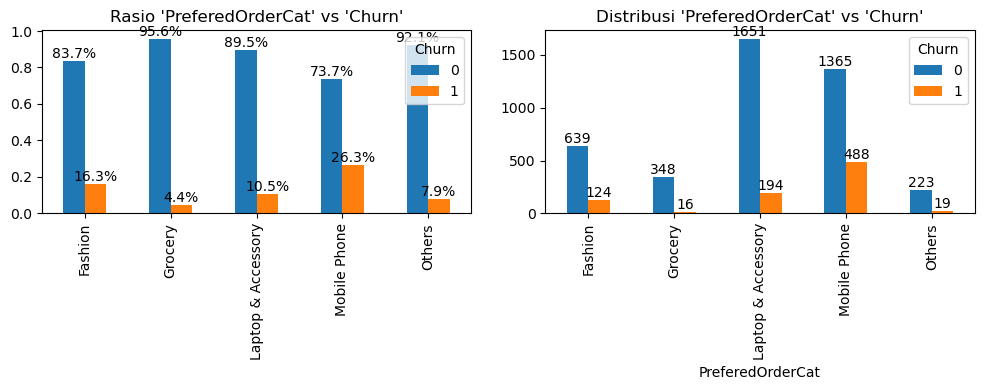

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={"width_ratios": [1, 1]})
                   
# Plot rasio 'PreferedOrderCat' vs churn
ax1.set_title("Rasio 'PreferedOrderCat' vs 'Churn'", color="black")
pd.crosstab(df['PreferedOrderCat'], df['Churn'], normalize=0).plot(kind='bar', ax=ax1)
ax1.set(xlabel="")
for p in ax1.patches:
    ax1.annotate(f"{p.get_height()*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
    
# Plot distribusi 'PreferedOrderCat' vs churn
ax2.set_title("Distribusi 'PreferedOrderCat' vs 'Churn'", color="black")
pd.crosstab(df['PreferedOrderCat'], df['Churn']).plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.subplots_adjust(wspace=10)
plt.tight_layout()
plt.show()

**insight :**

Pelanggan paling banyak membeli produk elektronik berupa mobile phone. Namun secara rasio **pelanggan yang membeli produk mobile phone lebih cenderung akan churn**. **Rekomendasi yang dapat diberikan adalah memberikan program khusus terkait produk Mobile Phone seperti penawaran diskon untuk produk aksesoris terkait atau program promosi berkelanjutan seperti program trade-in** yaitu pemberian diskon untuk produk tertentu ketika ingin melakukan upgrade produk untuk tahun-tahun yang akan datang.

**'HourSpendOnApp' vs 'Churn'**

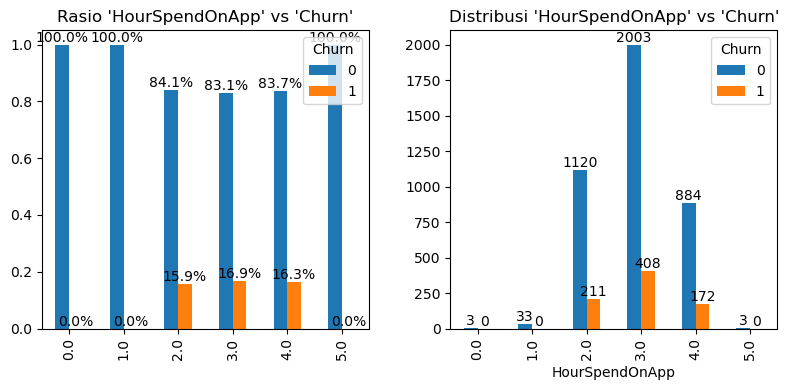

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={"width_ratios": [1, 1]})
                   
# Plot rasio 'HourSpendOnApp' vs churn
ax1.set_title("Rasio 'HourSpendOnApp' vs 'Churn'", color="black")
pd.crosstab(df['HourSpendOnApp'], df['Churn'], normalize=0).plot(kind='bar', ax=ax1)
ax1.set(xlabel="")
for p in ax1.patches:
    ax1.annotate(f"{p.get_height()*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
    
# Plot distribusi 'SatisfactionScore' vs churn
ax2.set_title("Distribusi 'HourSpendOnApp' vs 'Churn'", color="black")
pd.crosstab(df['HourSpendOnApp'], df['Churn']).plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.subplots_adjust(wspace=10)
plt.tight_layout()
plt.show()

**insight :**

Berdasarkan grafik diatas pelanggan terbanyak adalah pelanggan yang rata-rata menggunakan aplikasi/web app berdurasi sekitar 3 jam. Namun secara pola rasio tidak menunjukkan pola tertentu.

### Analisis Data Kepuasan Pelanggan

**'SatisfactionScore' vs 'Churn'**

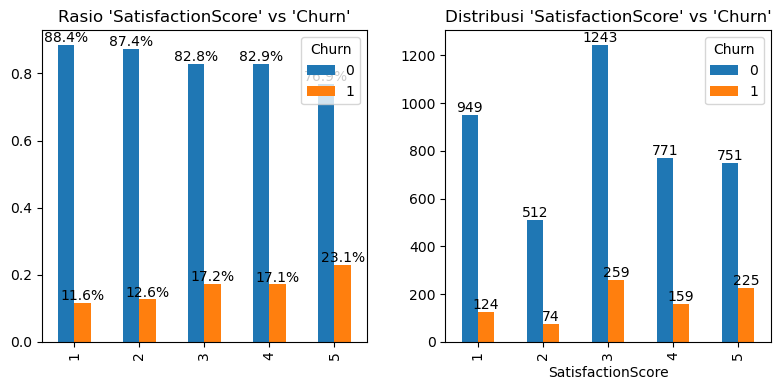

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={"width_ratios": [1, 1]})
                   
# Plot rasio 'SatisfactionScore' vs churn
ax1.set_title("Rasio 'SatisfactionScore' vs 'Churn'", color="black")
pd.crosstab(df['SatisfactionScore'], df['Churn'], normalize=0).plot(kind='bar', ax=ax1)
ax1.set(xlabel="")
for p in ax1.patches:
    ax1.annotate(f"{p.get_height()*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
    
# Plot distribusi 'SatisfactionScore' vs churn
ax2.set_title("Distribusi 'SatisfactionScore' vs 'Churn'", color="black")
pd.crosstab(df['SatisfactionScore'], df['Churn']).plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.subplots_adjust(wspace=10)
plt.tight_layout()
plt.show()

**insight :**

Berdasarkan grafik diatas dapat disimpulkan banyak pelanggan yang memberikan score 3 terkait rating kepuasan pelanggan. Namun secara rasio **pelanggan yang memberikan score 5 yang lebih cenderung churn**, hal ini dapat menunjukkan bahwa sistem rating/feedback/review tidak berjalan dengan baik. 

Adapun beberapa faktor penyebab sistem tidak berjalan dengan baik diantaranya adalah :
1. sistem rating hanya menampilkan score, tidak dapat memberikan comment sehingga pelanggan mengisi rating asal-asalan,
2. sistem rating menampilkan identitas pemberi rating sehingga pemberi rating merasa tidak nyaman.

Saran yang dapat diberikan adalah **perlu dilakukan perbaikan/perubahan terhadap sistem rating/feedback/review yang sedang digunakan lalu di lakukan testing untuk setiap jenisnya/perubahannya dan dicari hasil sistem yang terbaik**.

**'Complain' vs 'Churn'**

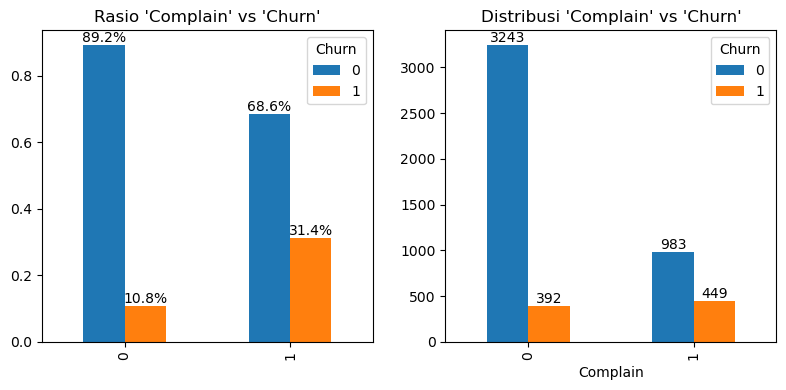

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={"width_ratios": [1, 1]})
                   
# Plot rasio 'Complain' vs churn
ax1.set_title("Rasio 'Complain' vs 'Churn'", color="black")
pd.crosstab(df['Complain'], df['Churn'], normalize=0).plot(kind='bar', ax=ax1)
ax1.set(xlabel="")
for p in ax1.patches:
    ax1.annotate(f"{p.get_height()*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
    
# Plot distribusi 'Complain' vs churn
ax2.set_title("Distribusi 'Complain' vs 'Churn'", color="black")
pd.crosstab(df['Complain'], df['Churn']).plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.subplots_adjust(wspace=10)
plt.tight_layout()
plt.show()

**insight :**

Pelanggan mayoritas adalah pelanggan yang belum pernah melakukan complain. Secara rasio **pelanggan yang pernah melakukan complain lebih cenderung akan churn**. Saran yang dapat diberikan sebaiknya **perlu melakukan penanganan terhadap keluhan pelanggan yang telah disampaikan**. Disarankan untuk memulai perbaikan terkait keluhan tersebut, dengan **mengkategorikan dan memberikan prioritas**. Selanjutnya, penting untuk **meninjau kembali SLA (Service Level Agreement)** terkait tingkat layanan yang diharapkan

### Analisis Data Transaksi dan Promosi

**'Tenure' vs 'Churn'**

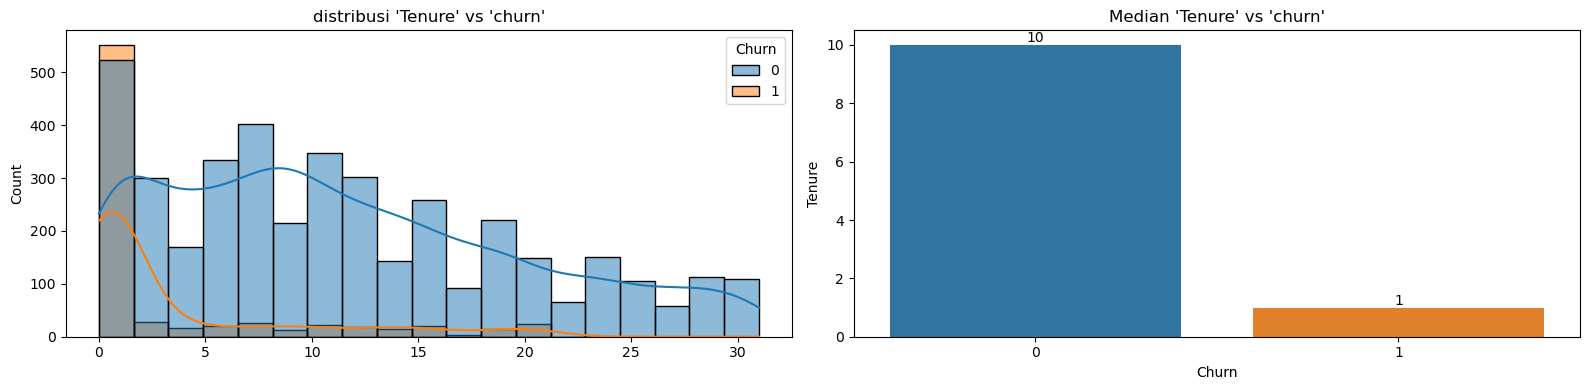

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={"width_ratios": [1, 1]})
    
# Plot distribusi 'Tenure' vs churn
ax1.set_title("distribusi 'Tenure' vs 'churn'", color="black")
sns.histplot(data = df, hue = df['Churn'], x = df['Tenure'], stat = 'count', kde = True, ax=ax1)
ax1.set(xlabel="")
    
# Plot median 'Tenure' vs churn
df_filtered = df.dropna(subset=['Tenure'])
ax2.set_title("Median 'Tenure' vs 'churn'", color="black")
sns.barplot(x='Churn', y='Tenure', data=df_filtered, estimator=np.median, ci=0, ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.tight_layout()
plt.show()

**insight :**

Dapat disimpulkan bahwa **pelanggan yang memiliki tenure rendah lebih cenderung akan churn**. Hal ini masuk dikarenakan pelanggan dengan tenure rendah dapat di interpretasikan sebagai pelanggan baru yang masih mencoba-coba layanan dari sebuah platform e-commerce. Sedangkan pelanggan dengan tenure tinggi di anggap telah nyaman untuk tetap bertransaksi dengan platform terkait secara long-term.

**'OrderAmountHikeFromlastYear' vs 'Churn'**

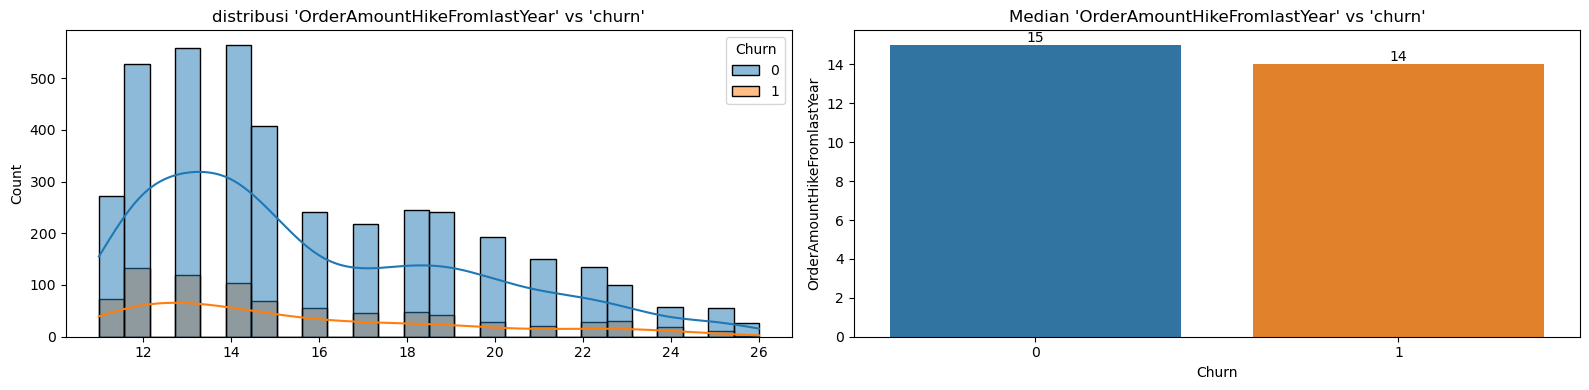

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={"width_ratios": [1, 1]})
    
# Plot distribusi 'OrderAmountHikeFromlastYear' vs churn
ax1.set_title("distribusi 'OrderAmountHikeFromlastYear' vs 'churn'", color="black")
sns.histplot(data = df, hue = df['Churn'], x = df['OrderAmountHikeFromlastYear'], stat = 'count', kde = True, ax=ax1)
ax1.set(xlabel="")
    
# Plot median 'OrderAmountHikeFromlastYear' vs churn
df_filtered = df.dropna(subset=['OrderAmountHikeFromlastYear'])
ax2.set_title("Median 'OrderAmountHikeFromlastYear' vs 'churn'", color="black")
sns.barplot(x='Churn', y='OrderAmountHikeFromlastYear', data=df_filtered, estimator=np.median, ci=0, ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas terlihat tidak ada perbedaan yang signifikan terkait kenaikan jumlah pembelian (tahun lalu) terhadap keputusan untuk churn atau tidak karena secara median baik yang churn atau tidak churn memiliki nilai yang hampir sama. Selanjutnya dapat digunakan metode uji hipotesis Mann whitney untuk melihat apakah mediannya berbeda signifikan atau tidak :

Hipotesis :
- Ho : Distribusi Data OrderAmountHikeFromlastYear 'Churn' >= Distribusi Data OrderAmountHikeFromlastYear 'Tidak Churn'
- Ha : Distribusi Data OrderAmountHikeFromlastYear 'Churn' < Distribusi Data OrderAmountHikeFromlastYear 'Tidak Churn'

In [45]:
# Uji hipotesis Mann whitney
stat, pvalue = mannwhitneyu(
    df[df['Churn'] == 1]['OrderAmountHikeFromlastYear'].dropna(),
    df[df['Churn'] == 0]['OrderAmountHikeFromlastYear'].dropna(),
    alternative = 'less'
)
pvalue

0.012101582847927518

In [46]:
# Kesimpulan
if pvalue > 0.05 :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
          TIDAK ADA cukup bukti untuk mengatakan bahwa distribusi 'OrderAmountHikeFromlastYear' terhadap pelanggan churn LEBIH KECIL dari
          distribusi 'OrderAmountHikeFromlastYear' terhadap pelanggan tidak churn
          (tidak adanya perbedaan terkait distribusi data)
          ''')
else :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
          ADA cukup bukti untuk mengatakan bahwa bahwa distribusi 'OrderAmountHikeFromlastYear' terhadap pelanggan churn LEBIH KECIL dari
          distribusi 'OrderAmountHikeFromlastYear' terhadap pelanggan tidak churn
          (ada perbedaan terkait distribusi data)
          ''')


          pvalue = 0.01210. pvalue <= 0.05. Berhasil menolak Ho.
          ADA cukup bukti untuk mengatakan bahwa bahwa distribusi 'OrderAmountHikeFromlastYear' terhadap pelanggan churn LEBIH KECIL dari
          distribusi 'OrderAmountHikeFromlastYear' terhadap pelanggan tidak churn
          (ada perbedaan terkait distribusi data)
          


**insight :**

Dapat disimpulkan bahwa meskipun secara visualisasi pengaruh dari 'OrderAmountHikeFromlastYear' tidak terlihat, namun secara statistik terdapat cukup bukti untuk mengatakan bahwa **median 'OrderAmountHikeFromlastYear' untuk pelanggan yang churn lebih kecil dari yang tidak churn**. Walaupun selisihnya sedikit namun dapat disimpulkan lagi bahwa **pelanggan yang churn dapat terlihat dari peningkatan jumlah order dari tahun ke tahun** memiliki persentase yang rendah dan ini cukup masuk akal.

**'CouponUsed' vs 'Churn'**

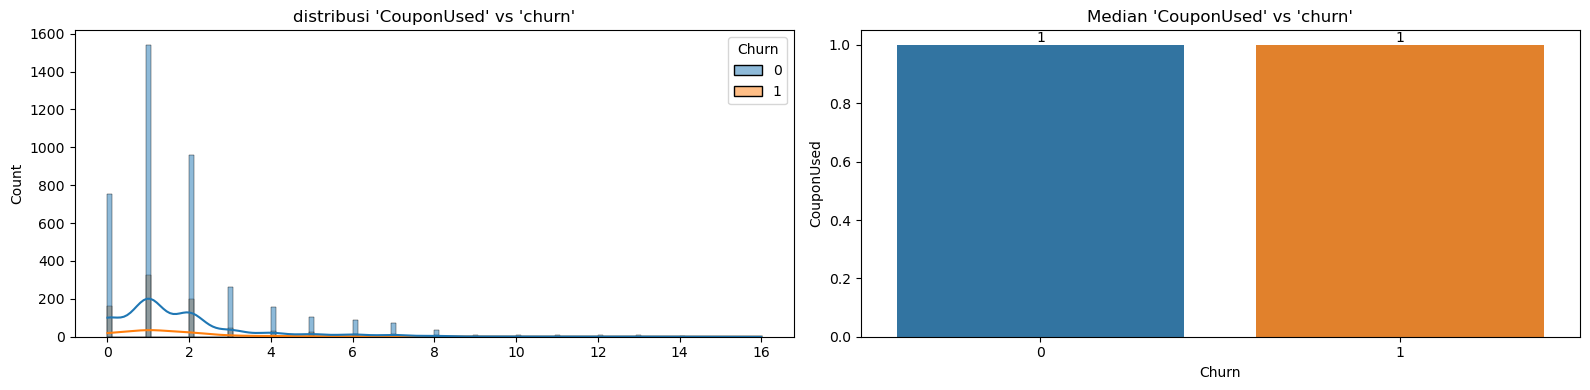

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={"width_ratios": [1, 1]})
    
# Plot distribusi 'CouponUsed' vs churn
ax1.set_title("distribusi 'CouponUsed' vs 'churn'", color="black")
sns.histplot(data = df, hue = df['Churn'], x = df['CouponUsed'], stat = 'count', kde = True, ax=ax1)
ax1.set(xlabel="")
    
# Plot median 'CouponUsed' vs churn
df_filtered = df.dropna(subset=['CouponUsed'])
ax2.set_title("Median 'CouponUsed' vs 'churn'", color="black")
sns.barplot(x='Churn', y='CouponUsed', data=df_filtered, estimator=np.median, ci=0, ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas terlihat tidak ada perbedaan yang signifikan terkait penggunaan kupon belanja terhadap keputusan untuk churn atau tidak karena secara median baik yang churn atau tidak churn memiliki nilai yang sama. Selanjutnya dapat digunakan metode uji hipotesis Mann whitney untuk melihat apakah mediannya berbeda signifikan atau tidak :

Hipotesis :
- Ho : Distribusi Data CouponUsed 'Churn' = Distribusi Data CouponUsed 'Tidak Churn'
- Ha : Distribusi Data CouponUsed 'Churn' != Distribusi Data CouponUsed 'Tidak Churn'

In [48]:
# Uji uji hipotesis Mann whitney
stat, pvalue = mannwhitneyu(
    df[df['Churn'] == 1]['CouponUsed'].dropna(),
    df[df['Churn'] == 0]['CouponUsed'].dropna(),
    alternative = 'two-sided'
)
pvalue

0.5589416152548343

In [49]:
# Kesimpulan
if pvalue > 0.05 :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
          TIDAK ADA cukup bukti untuk mengatakan bahwa distribusi jumlah penggunaan kupon terhadap pelanggan churn TIDAK SAMA dengan
          distribusi jumlah penggunaan kupon terhadap pelanggan tidak churn
          (tidak adanya perbedaan terkait distribusi data)
          ''')
else :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
          ADA cukup bukti untuk mengatakan bahwa bahwa distribusi jumlah penggunaan kupon terhadap pelanggan churn TIDAK SAMA dengan
          distribusi jumlah penggunaan kupon terhadap pelanggan tidak churn
          (ada perbedaan terkait distribusi data)
          ''')


          pvalue = 0.55894. pvalue > 0.05. Gagal menolak Ho.
          TIDAK ADA cukup bukti untuk mengatakan bahwa distribusi jumlah penggunaan kupon terhadap pelanggan churn TIDAK SAMA dengan
          distribusi jumlah penggunaan kupon terhadap pelanggan tidak churn
          (tidak adanya perbedaan terkait distribusi data)
          


**insight :**

Dapat disimpulkan baik secara visualisasi maupun secara statistik **tidak ditemukannya perbedaan yang signifikan terkait jumlah penggunakan kupon bagi yang churn maupun yang tidak churn**.

**'OrderCount' vs 'Churn'**

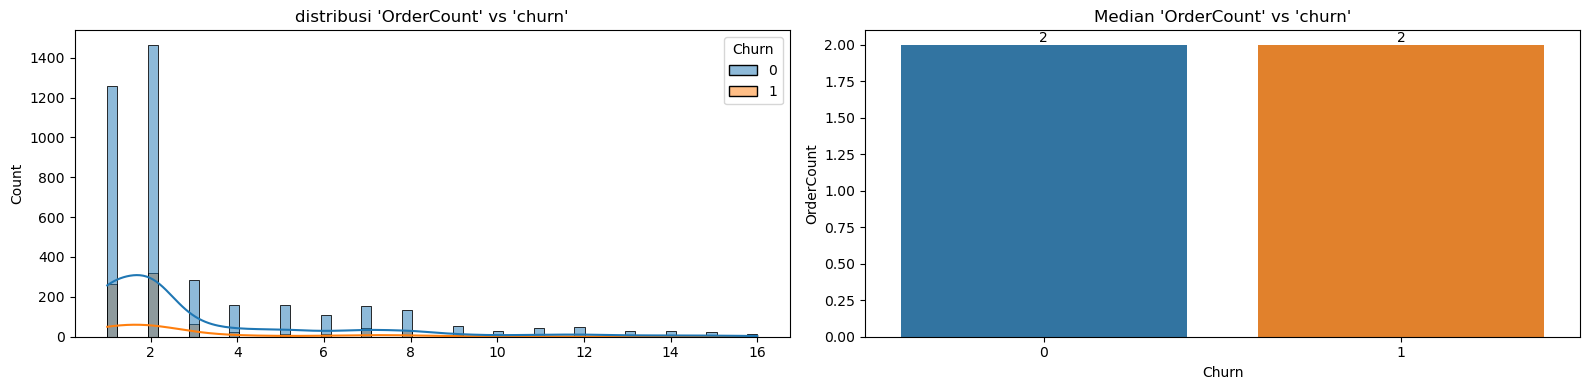

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={"width_ratios": [1, 1]})
    
# Plot distribusi 'OrderCount' vs churn
ax1.set_title("distribusi 'OrderCount' vs 'churn'", color="black")
sns.histplot(data = df, hue = df['Churn'], x = df['OrderCount'], stat = 'count', kde = True, ax=ax1)
ax1.set(xlabel="")
    
# Plot median 'OrderCount' vs churn
df_filtered = df.dropna(subset=['OrderCount'])
ax2.set_title("Median 'OrderCount' vs 'churn'", color="black")
sns.barplot(x='Churn', y='OrderCount', data=df_filtered, estimator=np.median, ci=0, ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas terlihat tidak ada perbedaan yang signifikan terkait jumlah pembelian produk terhadap keputusan untuk churn atau tidak karena secara median baik yang churn atau tidak churn memiliki nilai yang sama. Selanjutnya dapat digunakan metode uji hipotesis Mann whitney untuk melihat apakah mediannya berbeda signifikan atau tidak :

Hipotesis :
- Ho : Distribusi Data OrderCount 'Churn' = Distribusi Data OrderCount 'Tidak Churn'
- Ha : Distribusi Data OrderCount 'Churn' != Distribusi Data OrderCount 'Tidak Churn'

In [51]:
# Uji uji hipotesis Mann whitney
stat, pvalue = mannwhitneyu(
    df[df['Churn'] == 1]['OrderCount'].dropna(),
    df[df['Churn'] == 0]['OrderCount'].dropna(),
    alternative = 'two-sided'
)
pvalue

0.16115284048775558

In [52]:
# Kesimpulan
if pvalue > 0.05 :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
          TIDAK ADA cukup bukti untuk mengatakan bahwa distribusi jumlah pembelian produk terhadap pelanggan churn TIDAK SAMA dengan
          distribusi jumlah pembelian produk terhadap pelanggan tidak churn
          (tidak adanya perbedaan terkait distribusi data)
          ''')
else :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
          ADA cukup bukti untuk mengatakan bahwa distribusi jumlah pembelian produk terhadap pelanggan churn TIDAK SAMA dengan
          distribusi jumlah pembelian produk terhadap pelanggan tidak churn
          (ada perbedaan terkait distribusi data)
          ''')


          pvalue = 0.16115. pvalue > 0.05. Gagal menolak Ho.
          TIDAK ADA cukup bukti untuk mengatakan bahwa distribusi jumlah pembelian produk terhadap pelanggan churn TIDAK SAMA dengan
          distribusi jumlah pembelian produk terhadap pelanggan tidak churn
          (tidak adanya perbedaan terkait distribusi data)
          


**insight :**

Dapat disimpulkan baik secara visualisasi maupun statistik **tidak ditemukannya perbedaan yang signifikan terkait jumlah pembelian produk bagi yang churn maupun yang tidak churn**.

**'DaySinceLastOrder' vs 'Churn'**

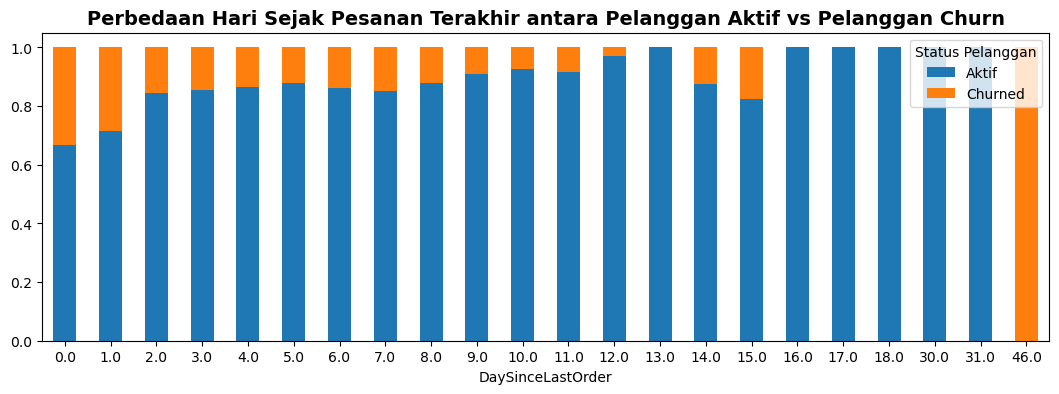

In [53]:
plt.figure(figsize=(13,4))
ax = plt.subplot(111)
order_churn = df.groupby('DaySinceLastOrder')['Churn'].value_counts(normalize=True).unstack('Churn')
order_churn.plot.bar(stacked=True, ax = ax)
plt.xticks(rotation=0)
plt.legend(title='Status Pelanggan', labels=['Aktif', 'Churned'], loc='upper right')
plt.title('Perbedaan Hari Sejak Pesanan Terakhir antara Pelanggan Aktif vs Pelanggan Churn', size=14, weight='bold');

Dapat dilihat pada tabel diatas berupa persebaran pelanggan yang churn atau tidak berdasarkan "jumlah hari setelah transaksi terakhir". Dapat disimpulkan bahwa pelanggan yang churn tidak dapat didefinisikan berdasarkan fitur DaySinceLastOrder karena ditemukan pelanggan yang churn walaupun pelanggan tersebut melakukan transaksi di hari yang sama ketika churn.

**insight :**

berdasarkan fitur **DaySinceLastOrder** ditemukan beberapa pelanggan yang churn beberapa hari kemudian/di hari yang sama setelah melakukan pesanan terakhir. Hal ini dapat mengindikasikan bahwa beberapa pelanggan yang churn tersebut adalah pelanggan yang tidak puas terhadap layanan/produk yang digunakan atau dibeli sehingga menyebabkan pelanggan langsung churn. Saran yang dapat diberikan yaitu perlu dilakukan peninjauan terkait tingkat kepuasan serta keluhan pelanggan khususnya bagi pelanggan yang churn dengan **DaySinceLastOrder** yang rendah agar dapat menemukan masalah terkait.

**'CashbackAmount' vs 'Churn'**

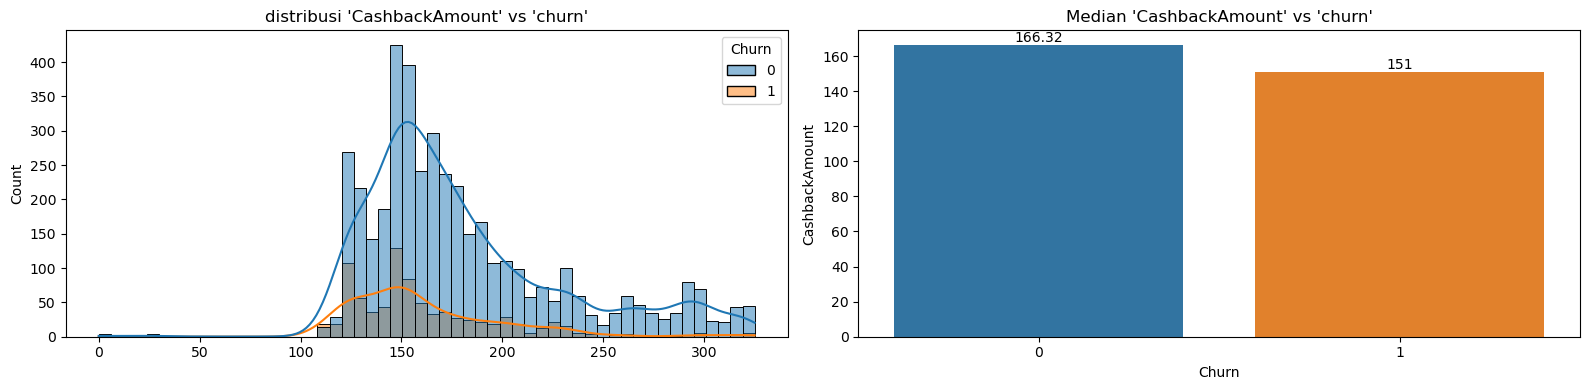

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={"width_ratios": [1, 1]})
    
# Plot distribusi 'CashbackAmount' vs churn
ax1.set_title("distribusi 'CashbackAmount' vs 'churn'", color="black")
sns.histplot(data = df, hue = df['Churn'], x = df['CashbackAmount'], stat = 'count', kde = True, ax=ax1)
ax1.set(xlabel="")
    
# Plot median 'CashbackAmount' vs churn
ax2.set_title("Median 'CashbackAmount' vs 'churn'", color="black")
sns.barplot(x = df['Churn'], y = df['CashbackAmount'], data = df, estimator=np.median, ci=0, ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Insight :

berdasarkan grafik diatas dapat dilihat nilai median untuk pelanggan yang churn yaitu 151USD dimana nilainya lebih rendah dari pelanggan yang tidak churn yaitu 166USD. walaupun perbedaanya tidak terlalu signifikan namun masih dapat disimpulkan bahwa **pelanggan yang mendapatkan cashback yang lebih rendah lebih cenderung akan churn**. Hal ini cukup wajar karena semakin tinggi cashback yang diberikan akan semakin tinggi minat pelanggan untuk melakukan transaksi pembelian. Selanjutnya dapat dilihat hubungan cashback dengan jenis barangnya.

<Axes: xlabel='PreferedOrderCat'>

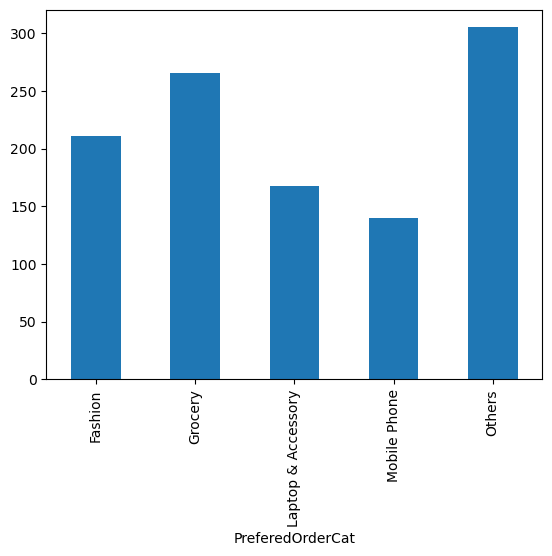

In [55]:
df.groupby('PreferedOrderCat')['CashbackAmount'].mean().plot(kind='bar')

**Insight :**

berdasarkan grafik diatas dapat dilihat untuk **rata-rata cashback yang paling rendah adalah kategori produk Mobile Phone**, hal ini sesuai dengan grafik sebelumnya terkait analisis 'PreferedOrderCat' vs 'Churn' dimana kategori produk Mobile Phone lebih cenderung churn. Dapat disimpulkan ada 2 faktor utama mengapa produk Mobile Phone lebih cenderung churn karena pertama adalah produk tersebut bukan produk harian sehingga pelanggan tidak melakukan pembelian rutin dan kedua adalah produk tersebut secara rata-rata mendapatkan cashback yang cukup rendah dibandingkan cashback yang diterima pada produk lainnya.

## Rekomendasi hasil EDA

Berdasarkan semua analisis yang telah dilakukan, diberikan beberapa rekomendasi sebagai berikut untuk dapat meningkatkan retensi pelanggan yang secara langsung akan meningkatkan revenue perusahaan :

- Sebaiknya lebih difokuskan untuk approach kepada **pelanggan yang berada di lokasi city tier 3** karena merupakan wilayah dengan **pelanggan terbanyak urutan ke-2** tetapi churn rate-nya paling tinggi. Rekomendasi yang dapat diberikan adalah **menawarkan insentif khusus berupa memberikan voucher untuk setiap pembelian yang dapat ditukar dengan barang atau layanan khususnya pada produk yang cenderung diminati seperti produk Laptop & Accessory**. Selain itu dapat juga **menawarkan penggabungan promosi apabila menggunakan sistem pembayaran E-Wallet** mengingat sistem pembayaran ini adalah yang paling diminati pada City Tier 3.
- Sebaiknya lebih difokuskan untuk approach kepada pelanggan yang masih **berstatus lajang** karena merupakan **pelanggan terbanyak urutan ke-2** tetapi churn rate-nya paling tinggi. Adapun rekomendasi yang dapat diberikan seperti **membuat program 'single day' dimana diadakan bazzar dan promo besar-besar untuk hari tertentu apabila membeli produk tertentu secara satuan**.
- Sebaiknya dilakukan perbaikan terkait akses dan atau sistem web-aplikasi sehingga dapat meningkatkan minat pelanggan yang selama ini melakukan akses platform e-commerce menggunakan **PC/Computer yang memiliki churn rate tinggi**. Rekomendasi yang dapat diberikan yaitu **melakukan survey lebih lanjut untuk web-aplikasi apakah terdapat masalah** UI/UX seperti kemungkinan tampilan yang tidak ramah, kerumitan dalam penggunaan, akses yang sulit dibuka ataupun masalah lainnya yang membuat pelanggan kurang berminat. **Selanjutnya dilakukan perbaikan terkait akses dan atau sistem web-aplikasi sehingga dapat meningkatkan minat pelanggan**.
- Sebaiknya dilakukan perbaikan terkait sistem pembayaran menggunakan **sistem COD karna sistem COD memiliki churn rate tinggi**. Rekomendasi yang dapat diberikan yaitu **perlu diadakan survey lebih lanjut terkait pembayaran dengan metode ini untuk monitoring dan evaluasi lalu dilakukan tindaklanjut berupa perbaikan sistem.**
- Sebaiknya difokuskan terhadap jenis produk **Mobile Phone yang memiliki churn rate yang tinggi**. Rekomendasi yang dapat diberikan adalah **memberikan program khusus terkait produk Mobile Phone seperti penawaran diskon untuk produk aksesoris terkait atau program promosi berkelanjutan seperti program trade-in** yaitu pemberian diskon untuk produk tertentu ketika ingin melakukan upgrade produk untuk tahun-tahun yang akan datang.
- Perlu dilakukan **perbaikan/perubahan terhadap sistem rating/feedback/review** yang sedang digunakan lalu di lakukan testing untuk setiap jenisnya/perubahannya dan dicari hasil sistem yang terbaik.
- Perlu melakukan penanganan terhadap keluhan pelanggan yang telah disampaikan. Disarankan untuk **memulai perbaikan terkait keluhan tersebut, dengan mengkategorikan dan memberikan prioritas**. Selanjutnya, penting untuk **meninjau kembali SLA (Service Level Agreement)** terkait tingkat layanan yang diharapkan.

# Data Preparation and Feature Selection

Adapun tahap pre-processing yang perlu dilakukan diantaranya adalah :

   - Handling _missing value_ : Mengatasi data _missing value_ dengan cara imputasi data _missing value_ tergantung dari kondisi datanya.
   - Feature Correlations : Pengecekan multicollinearity antar fitur.  
   - Normalisasi data: Mengubah skala data ke dalam rentang spesifik sehingga memiliki skala yang sama antar data. Dalam hal ini fitur scaling yang digunakan yaitu **robust scaler** karena data terdistribusi tidak normal dan lebih _robust_ terhadap outliers.  
   - Encoding : Mengubah variabel kategorik menjadi bentuk yang dapat digunakan oleh model, dalam proses ini kita akan melakukan **one hot encoding** untuk semua kolom fitur karena tidak ada data yang bersifat ordinal dan setiap fitur memiliki jumlah unik data yang tidak terlalu banyak.
   - Splitting : Memisahkan dataset menjadi bagian latihan (train) dan testing (test) untuk mengukur performa model secara objektif.
   - Define resampler : teknik untuk mengatasi imbalance data.

## Missing Value

Pada tahap ini akan dilakukan perbaikan terkait data yang mengandung _missing value_. Karena semua fitur data terdistribusi tidak normal maka pengisian _missing value_ akan dilakukan dengan median value.

In [56]:
# Mengisi data missing value dengan nilai median-nya
fill_median = ['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
for column in fill_median :
    median_value = df[column].median()
    df[column].fillna(value=median_value , inplace=True)
    
# Persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

## Feature Correlations

Pada tahapan ini akan dilakukan pengecekan korelasi fitur terhadap target (churn) dan pengecekan multicollinearity antar fitur. Apabila ditemukan multicollinearity antar fitur maka hanya salah satu fitur yang akan digunakan.

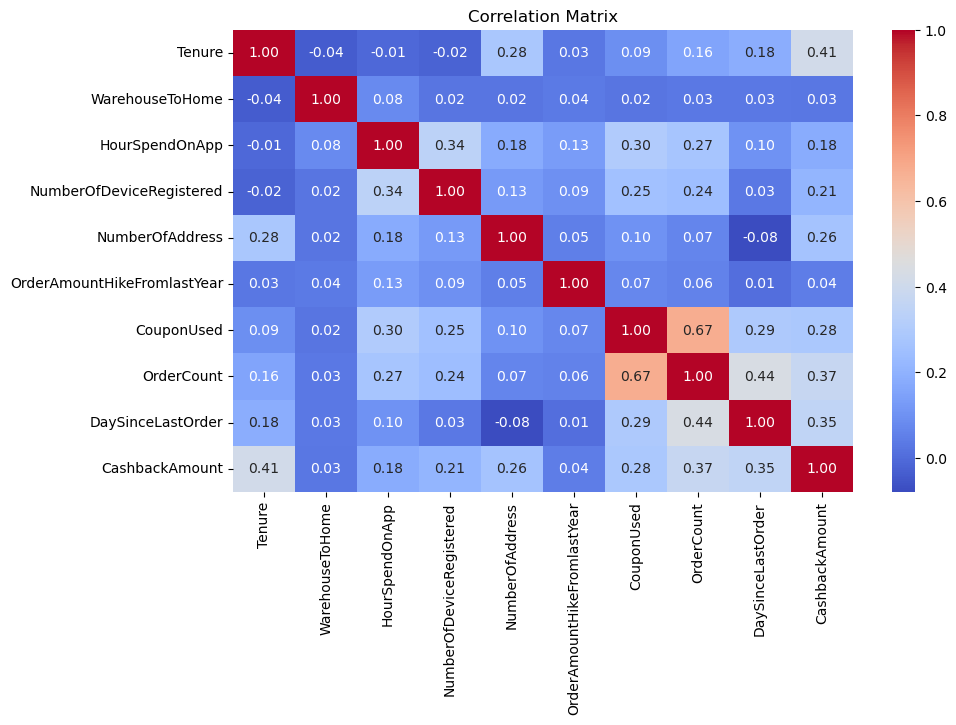

In [57]:
# Visualisasi heatmap korelasi antar fitur menggunakan metode spearman
kolom_numerik = ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered', 'NumberOfAddress', 
                 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
df_numerik = df[kolom_numerik]

correlation_matrix = df_numerik.corr(method='spearman')

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Dari hasil visualisasi diatas tidak ditemukan adanya multicollinearity antar fitur (>0.7). Maka semua fitur akan tetap digunakan untuk tahap modelling awal yang selanjutnya akan dilakukan seleksi fitur lagi setelah melalui tahap feature importance.

## Scalling

Digunakan robust scaler karna fitur numerik yang digunakan terdistribusi tidak normal. Selain itu robust scaler juga cukup baik dalam mengatasi data yang masih mengandung outlier.

In [58]:
scaler = RobustScaler()

## Encoding

Digunakan one hot encoding karena variasi dari nilai pada masing-masing fitur sedikit dan tidak ada hirarki tertentu.

In [59]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['PreferredLoginDevice','PreferredPaymentMode', 
                                             'PreferedOrderCat', 'MaritalStatus', 'Gender'])
], remainder='passthrough')

## Define Feature(X) & Target(y) and Splitting

In [60]:
# pendefinisian variabel dependent dan independent
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [61]:
# Splitting data train dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    stratify = y,
    test_size=0.2,
    random_state=200)

In [62]:
checking = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
checking.head(2)

,onehot__PreferredLoginDevice_Mobile Phone,onehot__PreferredPaymentMode_Credit Card,onehot__PreferredPaymentMode_Debit Card,onehot__PreferredPaymentMode_E wallet,onehot__PreferredPaymentMode_UPI,onehot__PreferedOrderCat_Grocery,onehot__PreferedOrderCat_Laptop & Accessory,onehot__PreferedOrderCat_Mobile Phone,onehot__PreferedOrderCat_Others,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,onehot__Gender_Male,remainder__Tenure,remainder__CityTier,remainder__WarehouseToHome,remainder__HourSpendOnApp,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__OrderAmountHikeFromlastYear,remainder__CouponUsed,remainder__OrderCount,remainder__DaySinceLastOrder,remainder__CashbackAmount
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,20.0,2.0,3.0,1.0,1.0,1.0,12.0,4.0,7.0,7.0,175.53
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6.0,1.0,19.0,2.0,3.0,1.0,4.0,0.0,18.0,1.0,1.0,2.0,134.52


## Define Resampler

In [63]:
# Untuk mengatasi imbalance data
rus = RandomUnderSampler(random_state=200)
smote = SMOTE(random_state=200)

SMOTE atau _Synthetic Minority Over-sampling Technique_ bekerja dengan cara menciptakan sampel data sintetis untuk kelas minoritas. Metode ini memilih sampel dari kelas minoritas dan menemukan k-nearest neighbors-nya (tetangga terdekat) dalam kelas yang sama. Kemudian, SMOTE mengambil sampel secara acak di antara k-nearest neighbors tersebut dan membuat sampel baru yang sintetis dengan melakukan interpolasi. Dengan demikian, SMOTE meningkatkan jumlah data pada kelas minoritas sehingga distribusi kelas menjadi lebih seimbang. 

Sedangkan RUS atau _Random Under-sampling_ bekerja dengan mengurangi jumlah sampel dari kelas mayoritas. Ini dilakukan dengan memilih sampel dari kelas mayoritas secara acak dan menghapusnya sampai jumlah sampel di kelas mayoritas dan minoritas menjadi lebih seimbang.

# Modelling

## Benchmarking Model

In [64]:
# Pendefinisian masing-masing model
logreg = LogisticRegression(random_state=200)
knn = KNeighborsClassifier()  # KNN doesn't have a random_state parameter
dt = DecisionTreeClassifier(random_state=200)
rf = RandomForestClassifier(random_state=200)
xgb = XGBClassifier(random_state=200)
svm = SVC(random_state=200)
lgbm = lgb.LGBMClassifier(random_state=200)


### Tanpa Imbalance Handling (Standard)

In [65]:
models = [logreg, knn, dt, rf, xgb, svm, lgbm]
f2_scorer = make_scorer(fbeta_score, beta=2)
list_f2_mean_n = []


# Mencari model terbaik berdasarkan f2
for algoritma in models :
    pipe_model = Pipeline([
        ('preprocess', transformer),
        ('scaler', scaler),
        ('model', algoritma)])
    
    # cross validation
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(
        estimator=pipe_model,
        X = X_train,    
        y = y_train,
        cv = skfold,
        scoring = f2_scorer,
        error_score = 'raise',
        n_jobs=-1)
    list_f2_mean_n.append(model_cv.mean())

In [66]:
# Perbandingan performa antar model
df_normal = pd.DataFrame({
    'model to train set (standard)':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVC', 'LightGBM'],
    'mean f2 score (standard)': list_f2_mean_n
}).sort_values('mean f2 score (standard)', ascending=False)
df_normal

,model to train set (standard),mean f2 score (standard)
4,XGBoost,0.828308
6,LightGBM,0.803744
2,Decision Tree,0.789897
3,Random Forest,0.774103
0,Logistic Regression,0.548123
5,SVC,0.509512
1,KNN,0.418023


Hasil cross-validation terhadap train set tanpa resample dengan metrik f2-score menghasilkan **XGBoost sebagai model terbaik dengan nilai rata-rata f2-score sebesar 0.828308**.

**Predict to test set (Standard)**

In [67]:
f2_score_test = []

# Mencari model terbaik berdasarkan f2 score terbesar
for algoritma in models :
    pipe_model = Pipeline([
        ('preprocess', transformer),
        ('scaler', scaler),
        ('model', algoritma)])

    # fitting
    pipe_model.fit(X_train, y_train)

    # predict
    y_pred = pipe_model.predict(X_test)

    # evaluate
    f2 = fbeta_score(y_test, y_pred, beta=2)
    f2_score_test.append(f2)

[LightGBM] [Info] Number of positive: 673, number of negative: 3380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 445
[LightGBM] [Info] Number of data points in the train set: 4053, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166050 -> initscore=-1.613886
[LightGBM] [Info] Start training from score -1.613886


In [68]:
# Perbandingan performa antar model
df_normal_test = pd.DataFrame({
    'model to test set (standard)':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVC', 'LightGBM'],
    'f2 score (standard)': f2_score_test,
}).sort_values('f2 score (standard)', ascending=False)
df_normal_test

,model to test set (standard),f2 score (standard)
4,XGBoost,0.880579
2,Decision Tree,0.840237
6,LightGBM,0.825183
3,Random Forest,0.813810
0,Logistic Regression,0.535484
5,SVC,0.533854
1,KNN,0.498688


Hasil predict terhadap test set tanpa resample menghasilkan **XGBoost sebagai model terbaik dengan nilai f2-score sebesar 0.880579**. Apabila dibandingkan dengan train set maka dapat disimpulkan bahwa modelling menggunakan XGBoost menghasilkan peforma yang baik.

### SMOTE

In [69]:
models = [logreg, knn, dt, rf, xgb, svm, lgbm]
f2_scorer = make_scorer(fbeta_score, beta=2)
f2_mean_smote = []

# Mencari model terbaik berdasarkan f2
for algoritma in models :
    pipe_model = Pipeline([
        ('preprocess', transformer),
        ('scaler', scaler),
        ('resample', smote),
        ('model', algoritma)])

    # cross validation
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(
        estimator=pipe_model,
        X = X_train,    
        y = y_train,
        cv = skfold,
        scoring = f2_scorer,
        error_score = 'raise',
        n_jobs=-1)
    f2_mean_smote.append(model_cv.mean())

In [70]:
# Perbandingan performa antar model
df_smote = pd.DataFrame({
    'model to train set (SMOTE)':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVC', 'LightGBM'],
    'mean f2 score (SMOTE)': f2_mean_smote
}).sort_values('mean f2 score (SMOTE)', ascending=False)
df_smote

,model to train set (SMOTE),mean f2 score (SMOTE)
4,XGBoost,0.821436
3,Random Forest,0.805916
6,LightGBM,0.794027
5,SVC,0.760378
1,KNN,0.756771
2,Decision Tree,0.720935
0,Logistic Regression,0.704474


Hasil cross-validation terhadap train set menggunakan resample smote dengan metrik f2-score menghasilkan **XGBoost sebagai model terbaik dengan nilai rata-rata f2-score sebesar 0.821436**.

**Predict to test set (SMOTE)**

In [71]:
f2_score_smote = []

# Mencari model terbaik berdasarkan f2 score terbesar
for algoritma in models :
    pipe_model = Pipeline([
        ('preprocess', transformer),
        ('scaler', scaler),
        ('resample', smote),
        ('model', algoritma)])

    # fitting
    pipe_model.fit(X_train, y_train)

    # predict
    y_pred = pipe_model.predict(X_test)

    # evaluate
    f2 = fbeta_score(y_test, y_pred, beta=2)
    f2_score_smote.append(f2)

[LightGBM] [Info] Number of positive: 3380, number of negative: 3380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000956 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5155
[LightGBM] [Info] Number of data points in the train set: 6760, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [72]:
# Perbandingan performa antar model
df_smote_predict = pd.DataFrame({
    'model to test set (SMOTE)':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVC', 'LightGBM'],
    'f2_score (SMOTE)': f2_score_smote,
}).sort_values('f2_score (SMOTE)', ascending=False)
df_smote_predict

,model to test set (SMOTE),f2_score (SMOTE)
4,XGBoost,0.876663
2,Decision Tree,0.854953
3,Random Forest,0.825183
6,LightGBM,0.805861
1,KNN,0.802534
5,SVC,0.777027
0,Logistic Regression,0.673797


In [73]:
# Menampilkan perbandingan hasil model dengan SMOTE antara train set dan test set
comparison_df = pd.concat([df_smote, df_smote_predict], axis=1)
comparison_df['Difference (%)'] = (comparison_df['f2_score (SMOTE)'] - comparison_df['mean f2 score (SMOTE)']) / comparison_df['mean f2 score (SMOTE)'] * 100
comparison_df

,model to train set (SMOTE),mean f2 score (SMOTE),model to test set (SMOTE),f2_score (SMOTE),Difference (%)
4,XGBoost,0.821436,XGBoost,0.876663,6.723131
3,Random Forest,0.805916,Random Forest,0.825183,2.390753
6,LightGBM,0.794027,LightGBM,0.805861,1.490389
5,SVC,0.760378,SVC,0.777027,2.189514
1,KNN,0.756771,KNN,0.802534,6.047233
2,Decision Tree,0.720935,Decision Tree,0.854953,18.589438
0,Logistic Regression,0.704474,Logistic Regression,0.673797,-4.354671


Pada tabel diatas, kita bisa melihat bahwa XGBoost lebih unggul dibandingkan model lainnya karena menghasilkan f2-score tertinggi serta adanya peningkatan f2-score dari pelatihan ke pengujian sebesar 6.723131%. Hal ini mengindikasikan bahwa **XGBoost efektif dalam menggeneralisasi dari data latih ke data uji tanpa _overfitting_ atau _underfitting_**.

### Random Undersampling (RUS)

In [74]:
models = [logreg, knn, dt, rf, xgb, svm, lgbm]
f2_scorer = make_scorer(fbeta_score, beta=2)
f2_mean_rus = []

# Mencari model terbaik berdasarkan f2
for algoritma in models :
    pipe_model = Pipeline([
        ('preprocess', transformer),
        ('scaler', scaler),
        ('resample', rus),
        ('model', algoritma)])

    # cross validation
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(
        estimator=pipe_model,
        X = X_train,    
        y = y_train,
        cv = skfold,
        scoring = f2_scorer,
        error_score = 'raise',
        n_jobs=-1)
    f2_mean_rus.append(model_cv.mean())

In [75]:
# Perbandingan performa antar model
df_rus = pd.DataFrame({
    'model to train set (RUS)':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVC', 'LightGBM'],
    'mean f2 score (RUS)': f2_mean_rus
}).sort_values('mean f2 score (RUS)', ascending=False)
df_rus

,model to train set (RUS),mean f2 score (RUS)
6,LightGBM,0.831894
3,Random Forest,0.831360
4,XGBoost,0.826697
5,SVC,0.728996
2,Decision Tree,0.720187
0,Logistic Regression,0.711302
1,KNN,0.651848


Hasil cross-validation terhadap train set menggunakan resample RUS dengan metrik f2-score menghasilkan **LightGBM sebagai model terbaik dengan nilai rata-rata f2-score sebesar 0.831894**.

**Predict to test set (RUS)**

In [76]:
f2_score_rus = []

# Mencari model terbaik berdasarkan f2 score terbesar
for algoritma in models :
    pipe_model = Pipeline([
        ('preprocess', transformer),
        ('scaler', scaler),
        ('resample', rus),
        ('model', algoritma)])

    # fitting
    pipe_model.fit(X_train, y_train)

    # predict
    y_pred = pipe_model.predict(X_test)

    # evaluate
    f2 = fbeta_score(y_test, y_pred, beta=2)
    f2_score_rus.append(f2)

[LightGBM] [Info] Number of positive: 673, number of negative: 673
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 1346, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [77]:
# Perbandingan performa antar model
df_rus_predict = pd.DataFrame({
    'model to test set (RUS)':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVC', 'LightGBM'],
    'f2_score (RUS)': f2_score_rus,
}).sort_values('f2_score (RUS)', ascending=False)
df_rus_predict

,model to test set (RUS),f2_score (RUS)
4,XGBoost,0.856052
6,LightGBM,0.854978
3,Random Forest,0.830619
2,Decision Tree,0.782065
5,SVC,0.705394
1,KNN,0.688299
0,Logistic Regression,0.683491


Hasil predict terhadap test set menggunakan resample RUS menghasilkan **XGBoost sebagai model terbaik dengan nilai f2-score sebesar 0.856052**. Apabila dibandingkan dengan test set maka dapat disimpulkan bahwa modelling menggunakan XGBoost dengan perlakukan RUS memiliki peforma yang baik. Namun hasil pengujian pada tes set dengan nilai f2-score untuk **XGBoost (RUS) masih lebih rendah bila dibandingkan dengan XGBoost (SMOTE)**.

### 2 Model Terbaik

In [78]:
# Menampilakn 2 model terbaik untuk 3 jenis : tanpa resampling, SMOTE resampling, random undersampling (RUS)
display(df_normal.head(2), df_normal_test.head(2), df_smote.head(2), df_smote_predict.head(2),df_rus.head(2),df_rus_predict.head(2))

,model to train set (standard),mean f2 score (standard)
4,XGBoost,0.828308
6,LightGBM,0.803744


,model to test set (standard),f2 score (standard)
4,XGBoost,0.880579
2,Decision Tree,0.840237


,model to train set (SMOTE),mean f2 score (SMOTE)
4,XGBoost,0.821436
3,Random Forest,0.805916


,model to test set (SMOTE),f2_score (SMOTE)
4,XGBoost,0.876663
2,Decision Tree,0.854953


,model to train set (RUS),mean f2 score (RUS)
6,LightGBM,0.831894
3,Random Forest,0.831360


,model to test set (RUS),f2_score (RUS)
4,XGBoost,0.856052
6,LightGBM,0.854978


Kesimpulan dari uji coba di atas adalah model yang akan digunakan untuk tahapan selanjutnya (_hyperparameter tuning_) yaitu XGBoost karena cukup konsisten di posisi teratas dengan f2-score sebagai acuan metriknya. _Imbalance Handling_ menggunakan _resampling_ tetap dilakukan mengingat data yang digunakan bersifat _imbalance_. **Adapun metode resampling yang akan digunakan adalah metode SMOTE karena menghasilkan f2-score lebih tinggi dibandingkan metode RUS (pengujian test set)**. Selanjutnya akan dilakukan _hyperparameter tuning_ untuk model XGBoost dengan  _resampling_ SMOTE.

## Hyperparameter Tuning

In [79]:
f2_scorer = make_scorer(fbeta_score, beta=2)

# Melakukan hyperparameter tuning untuk model terbaik yaitu XGBoost dengan resample SMOTE
hyperparam_space={
    'model__max_depth': randint(3, 10),
    'model__learning_rate': uniform(0.01, 0.1),
    'model__subsample': uniform(0.5, 0.5),
    'model__n_estimators': randint(50, 200)
}

pipe_model = Pipeline([
    ('preprocess', transformer),
    ('resampler', smote),
    ('model', xgb)                
])

random_xgb_s = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,
    scoring=f2_scorer,
    n_iter=400,
    n_jobs=-1,
    random_state=200
)

In [80]:
# fitting
random_xgb_s.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['PreferredLoginDevice',
                                                                                'PreferredPaymentMode',
                                                                                'PreferedOrderCat',
                                                                                'MaritalStatus',
                                                                                'Gender'])])),
                                             ('resampler',
                                              SMOTE(random_state=200)),...
                                        'model__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000252C5FCB090>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000252C5D88F50>,
                                        'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000252C5D89B50>},
                   random_state=200, scoring=make_scorer(fbeta_score, beta=2))

In [81]:
# best params
random_xgb_s.best_params_

{'model__learning_rate': 0.0938276962838915,
 'model__max_depth': 9,
 'model__n_estimators': 142,
 'model__subsample': 0.9479869166910638}

- model__learning_rate: Ini juga dikenal sebagai 'eta'. Parameter ini menentukan seberapa cepat model belajar. Nilai yang lebih rendah berarti pembelajaran yang lebih lambat tapi bisa menghasilkan model yang lebih akurat setelah melalui banyak siklus pembelajaran. Biasanya, nilai yang digunakan berkisar antara 0.01 dan 0.3.  

- model__max_depth: Parameter ini menentukan kedalaman maksimal dari pohon yang dibuat. Nilai yang lebih tinggi memungkinkan model untuk belajar hubungan yang lebih kompleks, tetapi juga bisa membuat model menjadi terlalu cocok (overfit) terhadap data latih. Nilai umumnya berada di kisaran 3 hingga 10.  

- model__n_estimators: Ini merujuk pada jumlah pohon yang akan dibangun dalam model. Lebih banyak pohon bisa meningkatkan performa tapi juga meningkatkan waktu komputasi. Nilai tipikal bisa berkisar dari 100 hingga 1000, tergantung pada ukuran dataset dan kompleksitas masalah.  

- model__subsample: Parameter ini menentukan fraksi sampel yang digunakan untuk pelatihan pohon individual. Ini adalah teknik untuk mengurangi overfitting. Nilai yang lebih rendah berarti sebagian kecil dari data akan digunakan, yang dapat membantu meningkatkan keandalan model tetapi mungkin memerlukan nilai n_estimators yang lebih tinggi. Nilai biasanya diatur antara 0.5 dan 1.

In [82]:
# f1_score terbaik train set
random_xgb_s.best_score_

0.8438300738407032

Hasil dari Hyperparameter Tuning pada train set menggunakan Randomized Search dengan n_iter=400 pada model XGBoost menunjukkan F1 score terbaik sebesar 0.8438.

In [83]:
best_model = random_xgb_s.best_estimator_
best_model.fit(X_train, y_train)
y_pred_tuned = best_model.predict(X_test)
f2_tuned = fbeta_score(y_test, y_pred_tuned, beta=2)

In [84]:
# Perbandingan performa antar model
df_tuned = pd.DataFrame({
    'tuned model to test set':['XGBoost'],
    'f2_score (before tuning)' : f2_score_smote[4],
    'f2_score (tuned)': f2_tuned,
})
df_tuned

,tuned model to test set,f2_score (before tuning),f2_score (tuned)
0,XGBoost,0.876663,0.879518


Setelah dilakukan tuning dihasilkan peningkatan performa model dari 0.876663 menjadi 0.879518. Walaupun kenaikan peforma model tidak signifikan, model final yang akan digunakan adalah model yang setelah dilakukan tuning untuk mendapatkan hasil model terbaik.

## Model Property

### Cara Kerja Model XGBoost

XGBoost, atau eXtreme Gradient Boosting, adalah algoritma pembelajaran mesin yang sangat populer dan efektif, terutama untuk tugas-tugas klasifikasi, regresi, dan peringkat<sup>[3]</sup>. Berikut adalah penjelasan sederhana tentang cara kerjanya:

1. Pemodelan Secara Berurutan: XGBoost bekerja dengan membangun model dalam urutan, di mana setiap model baru mencoba memperbaiki kesalahan yang dibuat oleh model sebelumnya. Ini dilakukan dengan menambahkan pohon keputusan baru pada setiap tahap yang berfokus pada memperbaiki prediksi yang salah dari model sebelumnya.  

2. Optimisasi Gradient: Algoritma ini menggunakan teknik yang disebut optimisasi gradient, di mana ia secara bertahap menemukan arah terbaik untuk menyesuaikan model agar dapat meminimalkan kesalahan. Di setiap langkah, XGBoost menyesuaikan bobot dari pohon-pohon sebelumnya untuk secara efektif mengurangi perbedaan antara prediksi aktual dan yang diharapkan.  

3. Pemangkasan Pohon: Tidak seperti algoritma pohon keputusan tradisional yang membangun pohon secara penuh kemudian memangkasnya untuk menghindari overfitting, XGBoost menggunakan strategi membangun pohon "greedy" dimana ia berhenti menambahkan cabang baru ketika menemukan bahwa penambahan tersebut tidak meningkatkan performa model secara signifikan.  

4. Penanganan Data yang Hilang: XGBoost secara otomatis menangani data yang hilang. Ketika data hilang pada sebuah sampel, XGBoost akan mencoba kedua cabang dari sebuah node dan memilih jalur yang memberikan output terbaik.  

5. Regularisasi: Salah satu keunggulan XGBoost adalah penggunaan teknik regularisasi, yang membantu mengurangi overfitting dengan menambahkan penalti pada fungsi objektif. Ini menjadikan model yang dihasilkan tidak hanya fokus pada meminimalkan kesalahan tetapi juga pada kesederhanaan model.  

6. Skalabilitas dan Efisiensi: XGBoost dirancang untuk efisiensi dan skalabilitas, memanfaatkan sumber daya komputasi secara maksimal, yang memungkinkannya berjalan lebih cepat daripada algoritma pohon lainnya. Hal ini membuatnya sangat populer untuk aplikasi-aplikasi yang memerlukan pemrosesan data besar.

### Features Importances

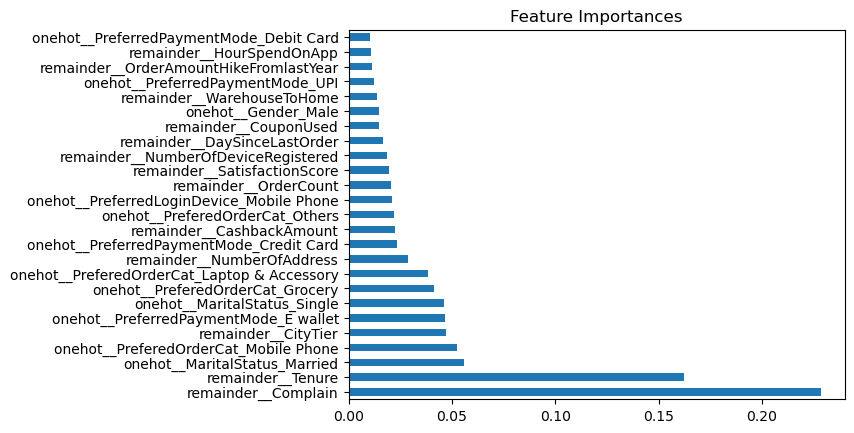

In [85]:
coef_final = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False)
coef_final.plot(kind='barh', title='Feature Importances')
plt.show()

In [86]:
coef_final.sort_values(ascending=False)

remainder__Complain                            0.228504
remainder__Tenure                              0.162409
onehot__MaritalStatus_Married                  0.055993
onehot__PreferedOrderCat_Mobile Phone          0.052313
remainder__CityTier                            0.047087
onehot__PreferredPaymentMode_E wallet          0.046795
onehot__MaritalStatus_Single                   0.046059
onehot__PreferedOrderCat_Grocery               0.041112
onehot__PreferedOrderCat_Laptop & Accessory    0.038455
remainder__NumberOfAddress                     0.028735
onehot__PreferredPaymentMode_Credit Card       0.023578
remainder__CashbackAmount                      0.022387
onehot__PreferedOrderCat_Others                0.021966
onehot__PreferredLoginDevice_Mobile Phone      0.020965
remainder__OrderCount                          0.020597
remainder__SatisfactionScore                   0.019573
remainder__NumberOfDeviceRegistered            0.018348
remainder__DaySinceLastOrder                   0

**Analisis Feature Importance :**

Berdasarkan hasil analisis _feature importance_ , beberapa _insights_ dapat dirangkum sebagai berikut:  

1. Keluhan Pelanggan (Complain) menonjol sebagai faktor paling penting, dengan bobot sebesar 0.161535. Ini menunjukkan bahwa pelanggan yang mengajukan keluhan memiliki kecenderungan yang lebih tinggi untuk churn. Hal ini menegaskan pentingnya manajemen keluhan dalam strategi retensi pelanggan.  

2. Usia/lamanya pelanggan terdaftar (Tenure) dengan bobot 0.137230, menunjukkan bahwa semakin lama pelanggan berinteraksi dengan platform, semakin kecil kemungkinan mereka untuk churn. Ini menunjukkan pentingnya membangun hubungan jangka panjang dengan pelanggan.  

3. Preferensi Kategori Pesanan, khususnya Ponsel (Mobile Phone) dengan bobot 0.081097, dan Laptop & Aksesoris dengan bobot 0.047184, menunjukkan bahwa jenis produk yang dibeli memiliki peran penting dalam loyalitas pelanggan.  

4. Status Perkawinan baik Single (0.050207) maupun Married (0.076785) menunjukkan demografi pelanggan mempengaruhi keputusan churn, dengan dinamika yang berbeda berdasarkan status sosial.  
5. Tier Kota (CityTier) dengan bobot 0.037610 dan Jumlah Perangkat Terdaftar (NumberOfDeviceRegistered) dengan bobot 0.035032, mengindikasikan bahwa faktor geografis dan keterlibatan teknologi pelanggan berdampak pada loyalitas mereka.  

6. Jenis Produk seperti produk grocery dengan bobot 0.039011, menunjukkan variasi preferensi produk juga berpengaruh terhadap kecenderungan churn, menandakan pentingnya diversifikasi produk.  

Analisis ini menggarisbawahi pentingnya memahami aspek-aspek tertentu dari interaksi pelanggan dengan platform, termasuk respons terhadap keluhan, lamanya pelanggan terdaftar, preferensi produk, dan faktor demografis. Hal ini memberikan dasar bagi pengembangan strategi yang lebih terfokus untuk meningkatkan kepuasan dan retensi pelanggan.

## Model-Based Feature Selection

Apabila diambil kesimpulan dari proses yang telah dilakukan pada tahapan EDA dan hasil analisis dari Feature Importance maka ditemukan fitur yang secara konsisten dianggap tidak berpengaruh dan atau memiliki skor hasil feature importance yang relatif rendah terhadap model yang telah dibuat diantaranya adalah **HourSpendOnApp**, **OrderAmountHikeFromlastYear**, **WarehouseToHome**, **CouponUsed**, **DaySinceLastOrder** dan **Gender**. Maka _feature_ tersebut tidak akan digunakan ke tes modelling selanjutnya.

Khusus fitur dengan skor feature importance rendah lainnya seperti PreferredPaymentMode dan PreferredLoginDevice tetap digunakan karena fitur tersebut ada yang mendapatkan skor hasil feature importance yang relatif tinggi seperti PreferredLoginDevice-Mobile Phone dan PreferredPaymentMode-E Wallet.

In [87]:
# Melakukan seleksi fitur dengan menghapus fitur yang tidak dipakai
X_train_filtered = X_train.drop(columns=['WarehouseToHome', 'Gender', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'DaySinceLastOrder'])
X_test_filtered = X_test.drop(columns=['WarehouseToHome', 'Gender', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'DaySinceLastOrder'])

In [88]:
transformer_filtered = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['PreferredLoginDevice', 'PreferredPaymentMode',
                                             'PreferedOrderCat', 'MaritalStatus'])
], remainder='passthrough')

In [89]:
# Fitting model setelah seleksi fitur menggunakan model estimator hasil tuning
final_model_filtered = Pipeline([
    ('preprocess', transformer_filtered),
    ('scaler', scaler),
    ('resampler', smote),
    ('model', best_model[-1])                
])

final_model_filtered.fit(X_train_filtered, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('scaler', RobustScaler()),
                ('resampler', SMOTE(random_state=200)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsampl...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.0938276962838915, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=9,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=142,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=200, ...))])

In [90]:
# Melakukan prediksi pada model hasil seleksi fitur pada test set
y_pred_final_filtered = final_model_filtered.predict(X_test_filtered)

# Evaluasi skor F2
final_filtered_score = fbeta_score(y_test, y_pred_final_filtered, beta=2)
final_filtered_score

0.837378640776699

In [91]:
# Perbandingan performa antar model pada test set sebelum vs sesudah seleksi fitur (SMOTE dan setelah tuning)
df_final_model = pd.DataFrame({
    'model tuned':['XGBoost'],
    'f2_score (SMOTE tuning non-filtered)' : f2_tuned,
    'f2_score (SMOTE tuning filtered)': final_filtered_score,
})
df_final_model

,model tuned,f2_score (SMOTE tuning non-filtered),f2_score (SMOTE tuning filtered)
0,XGBoost,0.879518,0.837379


Dapat dilihat terjadi penurunan pada hasil pengujian test set terkait f2-score nya setelah dilakukan reduksi fitur yaitu dari 0.837379 menjadi 0.835366. Karena penurunan peforma yang tidak signifikan dan hasil f2-score skor sama-sama diatas 0.8, maka dapat disimpulkan bahwa kedua model tetap memiliki peforma yang bagus. Untuk model final yang akan digunakan adalah model XGBoost (SMOTE) dengan tuning tanpa reduksi fitur karena menghasilkan nilai terbaik.

## Limitasi Model

| Feature | Data Type | Description |
| --- | --- | --- |
| Tenure | Float | Tenure pelanggan berkisar 0-31 bulan |
| PreferredLoginDevice | Text | Perangkat yang digunakan : Mobile Phone, Computer |
| CityTier | Int | City tier : 1,2,3 |
| WarehouseToHome | Float | Jarak tempuh pelanggan berkisar 5-36 KM |
| PreferredPaymentMode | Text | Tipe pembayaran pelanggan yaitu : Debit Card, UPI, Credit Card, Cash on Delivery, E wallet |
| NumberOfDeviceRegistered | Int | Jumlah perangkat yang didaftarkan berkisar 1-6 perangkat |
| PreferedOrderCat | Text | Jenis produk yang dijual terbatasi pada : Laptop & Accessory, Mobile Phone, Others, Fashion, Grocery |
| SatisfactionScore | Int | Rating dibatasi dari skor 1 - 5 |
| MaritalStatus | Text | Status pernikahan terdiri dari : Lajang, Cerai, Menikah |
| Complain | Int | Pernah melakukan complain [1] atau tidak [0] |
| OrderAmountHikeFromlastYear | Float | Persentase kenaikan jumlah pembeli berkisar 11-26 % |
| DaySinceLastOrder | Float | Pelanggan tidak melakukan belanja tidak lebih dari 46 hari |
| CashbackAmount | Float | rata-rata cashback yang diterima berkisar 0-300 USD |

## Analisis Probabilitas

Analisis Kelas Probability Terhadap Akurasi Prediksi

In [92]:
# Pengelompokan kelas probabilitas
def probclass(x):
    if 0 <= x < 0.1 :
        return '0% - 10%'
    elif 0.1 <= x < 0.2 :
        return '10% - 20%'
    elif 0.2 <= x < 0.3 :
        return '20% - 30%'
    elif 0.3 <= x < 0.4 :
        return '30% - 40%'
    elif 0.4 <= x < 0.5 :
        return '40% - 50%'
    elif 0.5 <= x < 0.6 :
        return '50% - 60%'
    elif 0.6 <= x < 0.7 :
        return '60% - 70%'
    elif 0.7 <= x < 0.8 :
        return '70% - 80%'
    elif 0.8 <= x < 0.9 :
        return '80% - 90%'
    elif 0.9 <= x <= 1.0 :
        return '90% - 100%'

In [93]:
# fitting model
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'PreferedOrderCat',
                                                   'MaritalStatus',
                                                   'Gender'])])),
                ('resampler', SMOTE(random_state=200)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, co...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.0938276962838915, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=9,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=142,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=200, ...))])

In [94]:
# mengambil data y_pred dan y_pred proba untuk data test
y_pred_proba_xgb = best_model.predict_proba(X_test)[:,-1]
y_pred_xgb = best_model.predict(X_test)

In [95]:
# pembuatan dataset baru dan memasukkan kolom y_pred_proba, class proba, y_pred, dan y_actual
df_proba = X_test
df_proba['pred_proba'] = y_pred_proba_xgb
df_proba['proba_class'] = df_proba['pred_proba'].apply(probclass)
df_proba['y_pred'] = y_pred_xgb
df_proba['y_actual'] = y_test
df_proba['y_pred_1'] = df_proba['y_pred'].apply(lambda x : 1 if x == 1 else 0)
df_proba['y_pred_0'] = df_proba['y_pred'].apply(lambda x : 1 if x == 0 else 0)
df_proba['y_actual_1'] = df_proba['y_actual'].apply(lambda x : 1 if x == 1 else 0)
df_proba['y_actual_0'] = df_proba['y_actual'].apply(lambda x : 1 if x == 0 else 0)
df_proba.head(3)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,pred_proba,proba_class,y_pred,y_actual,y_pred_1,y_pred_0,y_actual_1,y_actual_0
3134,5.0,Computer,1,7.0,Debit Card,Female,4.0,4,Laptop & Accessory,5,Divorced,3,0,13.0,2.0,2.0,4.0,166.48,0.000255,0% - 10%,0,0,0,1,0,1
4543,6.0,Computer,1,36.0,Credit Card,Female,4.0,4,Mobile Phone,3,Single,11,0,13.0,7.0,8.0,8.0,165.25,0.003022,0% - 10%,0,0,0,1,0,1
2217,0.0,Mobile Phone,3,24.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Married,3,0,11.0,1.0,1.0,2.0,162.32,0.046954,0% - 10%,0,0,0,1,0,1


In [96]:
# Mengambil list rata-rata pred proba untuk setiap kelas
list_avg_pred_proba = df_proba[['proba_class','pred_proba']].groupby('proba_class').mean().values

# Membuat dataframe baru untuk menganalisis pred proba dan actual proba
df_proba_2 = df_proba[['proba_class','y_pred_1','y_pred_0','y_actual_1','y_actual_0']].groupby('proba_class',as_index=False).sum()
df_proba_2['proba_average_actual'] = df_proba_2['y_actual_1']*100/(df_proba_2['y_actual_0']+df_proba_2['y_actual_1'])
df_proba_2['proba_average_predict'] = list_avg_pred_proba*100
df_proba_2

,proba_class,y_pred_1,y_pred_0,y_actual_1,y_actual_0,proba_average_actual,proba_average_predict
0,0% - 10%,0,819,10,809,1.221001,0.986909
1,10% - 20%,0,17,3,14,17.647059,14.222429
2,20% - 30%,0,9,4,5,44.444444,24.126249
3,30% - 40%,0,9,3,6,33.333333,34.554077
4,40% - 50%,0,2,2,0,100.000000,42.900200
5,50% - 60%,10,0,7,3,70.000000,55.206097
6,60% - 70%,7,0,6,1,85.714286,64.321434
7,70% - 80%,13,0,11,2,84.615385,75.042023
8,80% - 90%,26,0,23,3,88.461538,84.607658
9,90% - 100%,102,0,99,3,97.058824,96.401390


Berdasarkan data yang ditampilkan pada tabel, dapat dilihat bahwa jumlah prediksi False Negative (y_actual_1 untuk kelas probabilitas 0%-50%) dan jumlah prediksi False Positive (y_actual_0 untuk kelas probabilitas 50%-100%) sama-sama rendah. Hal ini menunjukkan bahwa model telah berhasil meminimalisir False Negative dan False Positive dengan cukup baik dan telah mengambil pendekatan yang efektif dalam memaksimalkan dampak bisnis.

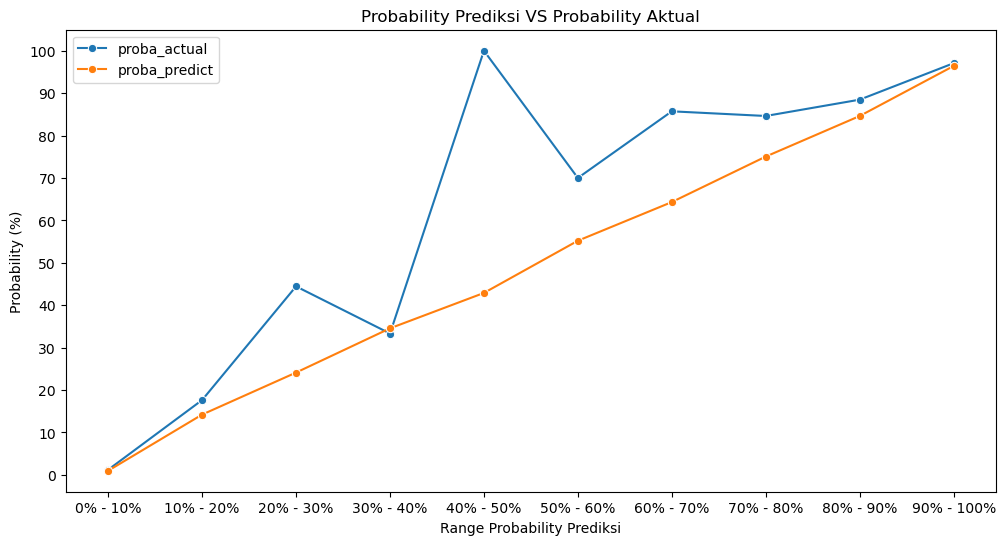

In [97]:
# Melakukan Visualisasi
plt.figure(figsize=(12,6))
plt.title('Probability Prediksi VS Probability Aktual')
sns.lineplot(data=df_proba_2, x = 'proba_class', y = 'proba_average_actual',marker='o',errorbar=None)
sns.lineplot(data=df_proba_2, x = 'proba_class', y = 'proba_average_predict',marker='o')
plt.legend(['proba_actual','proba_predict'])
plt.xlabel('Range Probability Prediksi')
plt.yticks(ticks=np.arange(0,110,10))
plt.ylabel('Probability (%)')
plt.show()

Model secara umum menunjukkan kemampuan yang baik dalam memprediksi probabilitas _churn_, dengan garis probabilitas yang diprediksi mengikuti tren yang serupa dengan probabilitas aktual. Namun, ada perbedaan yang mencolok pada rentang 40%-70% dimana model terindikasi underestimated pada rentang tersebut.

In [98]:
# Mencari prediction accuracy untuk setiap kelas probabilistik
list_accuracy = []
for i in ['0% - 10%','10% - 20%','20% - 30%','30% - 40%','40% - 50%','50% - 60%','60% - 70%','70% - 80%','80% - 90%','90% - 100%'] :
    df_proba1 = df_proba[df_proba['proba_class'] == i]
    df_proba1['accuracy'] = np.where(df_proba1['y_pred']==df_proba1['y_actual'],1,0)
    accuracy = df_proba1['accuracy'].sum() * 100/ len(df_proba1) 
    list_accuracy.append(accuracy)

In [99]:
# Menyimpannya dalam dataframe
df_distributed_proba = pd.DataFrame({
    'Range Probability' : ['0% - 10%','10% - 20%','20% - 30%','30% - 40%','40% - 50%','50% - 60%','60% - 70%','70% - 80%','80% - 90%','90% - 100%'],
    'Prediction Accuracy (%)' : list_accuracy
})
df_distributed_proba

,Range Probability,Prediction Accuracy (%)
0,0% - 10%,98.778999
1,10% - 20%,82.352941
2,20% - 30%,55.555556
3,30% - 40%,66.666667
4,40% - 50%,0.000000
5,50% - 60%,70.000000
6,60% - 70%,85.714286
7,70% - 80%,84.615385
8,80% - 90%,88.461538
9,90% - 100%,97.058824


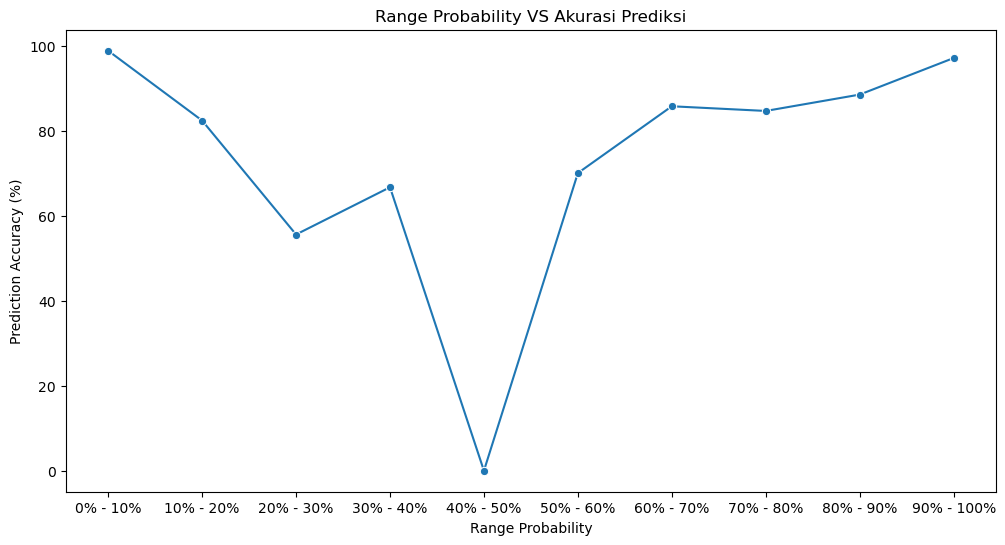

In [100]:
# Melakukan Visualisasi
plt.figure(figsize=(12,6))
plt.title('Range Probability VS Akurasi Prediksi')
sns.lineplot(data=df_distributed_proba, x = 'Range Probability', y = 'Prediction Accuracy (%)',marker='o')
plt.show()

Dari grafik yang menampilkan hubungan antara rentang probabilitas dan akurasi prediksi, kita bisa mendapatkan wawasan sebagai berikut:

1. Penurunan Akurasi di Rentang Awal: Terdapat penurunan akurasi yang signifikan pada rentang probabilitas awal, dari 10%-50%.  

2. Peningkatan Akurasi di Rentang Tertentu: Mulai rentang 50%-70%, akurasi prediksi meningkat secara drastis.

3. Fluktuasi Akurasi: Terjadi fluktuasi akurasi yang tajam antara rentang 70%-80%, menandakan inkonsistensi dalam prediksi pada rentang probabilitas tersebut.  
4. Stabil akurasi : Terjadi kestabilan akurasi pada rentang 0-10% dan 90-100%

Grafik ini mengindikasikan bahwa mungkin ada ruang untuk peningkatan pada model, khususnya dalam menangani prediksi di rentang probabilitas menengah hingga rendah. Stabilitas dan tingginya akurasi pada rentang probabilitas yang lebih tinggi menunjukkan bahwa model dapat diandalkan dalam kondisi-kondisi tersebut.

# Analisis Keuntungan Financial

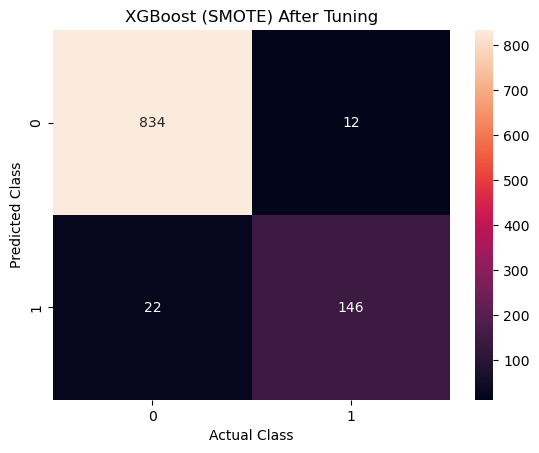

In [101]:
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='g').set_title('XGBoost (SMOTE) After Tuning')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class');
plt.show()

**Analisis :**

Pada tahap ini kita akan mencoba melakukan analisis financial untuk dapat menunjukkan bahwa penggunaan model akan lebih menguntungkan daripada tidak menggunakan model. Diasumsikan total pelanggan adalah 1014 pelanggan.

1. Skenario **dengan model** : 
Apabila menggunakan model maka perusahaan tidak akan melakukan approach kepada semua pelanggan, melainkan hanya pelanggan yang diprediksi akan churn. Adapun _error cost_ pada model adalah biaya yang diperlukan untuk menggatikan atau mencari pelanggan baru akibat salah prediksi customer yang seharusnya churn tetapi diprediksi tidak churn, yang mengakibatkan kehilangan pelanggan. Berikut perhitungan _cost benefit_ menggunakan model.  
- Total CRC = 13 USD * (22 + 146) = 2184 USD  
- Total _error cost_ = 65 USD * 12 = 780 USD  
- Total cost = 2184 USD + 65 USD = **2964 USD**  

2. Skenario **tanpa model** :
Apabila perusahaan tidak menggunakan model maka perusahaan akan melakukan approach terhadap semua pelanggan. Estimasi biaya pengeluaran sebesar:  
- 13 USD * 1014 (Total pelanggan) = **13182 USD**

3. Skenario **tidak melakukan treatment sama sekali** :
Apabila tidak ada treatment sama sekali pada seluruh pelanggan maka kerugian yang diterima setidaknya adalah berupa biaya akuisisi pelanggan churn sebesar:
- 13 USD * (146 + 12) = 2054 USD

Berdasarkan skenario 1 dan skenario 2 (skenario 3 tidak masuk kedalam analisis selanjutnya karena secara logika skenario 3 sudah pasti akan dihindari) maka dapat disimpulkan **biaya yang dihemat perusahaan dapat berkisar 13182 USD - 2964 USD = 10218 USD per 1000 pelanggan atau sekitar 10.218 USD per pelanggan**, yang mana itu adalah **penghematan sebesar 77.514%** dibanding tidak menggunakan model.

# Kesimpulan dan Rekomendasi

## Kesimpulan

**Berdasarkan data analisis yang telah dilakukan, maka didapatkan kesimpulan atas pertanyaan bisnis yang ada :**

1. Bagaimana karakteristik pelanggan berdasarkan **informasi personalnya** (jenis kota, status pernikahan, kelamin, jenis perangkat, jenis pembayaran, jenis produk favorit, durasi penggunaan aplikasi/web app) ? Pelanggan yang lebih cenderung churn adalah :

- Pelanggan yang berlokasi di city tier 3,
- Pelanggan yang berstatus sudah lajang,
- Pelanggan yang menggunakan perangkat Komputer,
- Pelanggan yang menggunakan COD,
- Pelanggan yang berbelanja produk berjenis Mobile Phone,
- Adapun hal yang tidak berpengaruh yaitu _gender_ dan durasi penggunaan aplikasi/web app.

2. Bagaimana karakteristik pelanggan berdasarkan **tingkat kepuasannya** (rating, keluhan) ? Pelanggan yang lebih cenderung churn adalah :

- Tidak ada pengaruh rating dalam keputusan pelanggan (indikasi fitur rating tidak berjalan dengan baik),
- Pelanggan yang pernah memberikan keluhan.

3. Bagaimana karakteristik pelanggan berdasarkan **riwayat transaksi & promosi yang didapatkan** (lamanya terdaftar, peningkatan jumlah pembelian, jumlah pembelian, penggunaan kupon, penerimaan cashback, jumlah hari setelah hari terakhir pembelian) ? Pelanggan yang lebih cenderung churn adalah :

- Pelanggan yang baru daftar,
- Pelanggan yang memiliki jumlah peningkatan pembelian dari tahun sebelumnnya rendah,
- Pelanggan yang mendapatkan cashback lebih rendah,
- Adapun hal yang tidak berpengaruh yaitu jumlah penggunaan kupon, jumlah pembelian dan jumlah hari setelah hari terakhir belanja.


**Berdasarkan hasil modeling didapatkan kesimpulan sebagai berikut :**

1. Model dengan performa terbaik dalam melakukan prediksi berdasarkan hasil uji coba dengan dataset ini adalah XGBoost.

2. Resampler terbaik pada pemodelan menggunakan dataset ini adalah dengan metode SMOTE dikarenakan menghasilkan rata-rata f1 score lebih baik dari metode Random Undersampling untuk semua model.

3. Model terpilih yaitu XGBoost mendapatkan peningkatan performa setelah dilakukan hyperparameter tuning dengan nilai f1 score sebelum tuning sebesar 0.89 dan setelah tuning sebesar 0.90. Parameter hasil tuning adalah sebagai berikut : subsample = 0.9686, n_estimators = 198, max_depth = 8, learning_rate = 0.10712.

4. Kita harus berhati-hati ketika melakukan interpretasi di luar interval independen variabel. Model ini hanya berlaku pada rentang data yang digunakan dengan limitasi Model adalah sebagai berikut :

| Feature | Data Type | Description |
| --- | --- | --- |
| Tenure | Float | Tenure pelanggan berkisar 0-31 bulan |
| PreferredLoginDevice | Text | Perangkat yang digunakan : Mobile Phone, Computer |
| CityTier | Int | City tier : 1,2,3 |
| WarehouseToHome | Float | Jarak tempuh pelanggan berkisar 5-36 KM |
| PreferredPaymentMode | Text | Tipe pembayaran pelanggan yaitu : Debit Card, UPI, Credit Card, Cash on Delivery, E wallet |
| NumberOfDeviceRegistered | Int | Jumlah perangkat yang didaftarkan berkisar 1-6 perangkat |
| PreferedOrderCat | Text | Jenis produk yang dijual terbatasi pada : Laptop & Accessory, Mobile Phone, Others, Fashion, Grocery |
| SatisfactionScore | Int | Rating dibatasi dari skor 1 - 5 |
| MaritalStatus | Text | Status pernikahan terdiri dari : Lajang, Cerai, Menikah |
| Complain | Int | Pernah melakukan complain [1] atau tidak [0] |
| OrderAmountHikeFromlastYear | Float | Persentase kenaikan jumlah pembeli berkisar 11-26 % |
| DaySinceLastOrder | Float | Pelanggan tidak melakukan belanja tidak lebih dari 46 hari |
| CashbackAmount | Float | rata-rata cashback yang diterima berkisar 0-300 USD |

## Rekomendasi

**Berdasarkan data analisis yang telah dilakukan, diberikan rekomendasi agar dapat meningkatkan retensi pelanggan :**

- Sebaiknya lebih difokuskan untuk approach kepada **pelanggan yang berada di lokasi city tier 3** karena merupakan wilayah dengan **pelanggan terbanyak urutan ke-2** tetapi churn rate-nya paling tinggi. Rekomendasi yang dapat diberikan adalah **menawarkan insentif khusus berupa memberikan voucher untuk setiap pembelian yang dapat ditukar dengan barang atau layanan khususnya pada produk yang cenderung diminati seperti produk Laptop & Accessory**. Selain itu dapat juga **menawarkan penggabungan promosi apabila menggunakan sistem pembayaran E-Wallet** mengingat sistem pembayaran ini adalah yang paling diminati pada City Tier 3.
- Sebaiknya lebih difokuskan untuk approach kepada pelanggan yang masih **berstatus lajang** karena merupakan **pelanggan terbanyak urutan ke-2** tetapi churn rate-nya paling tinggi. Adapun rekomendasi yang dapat diberikan seperti **membuat program 'single day' dimana diadakan bazzar dan promo besar-besar untuk hari tertentu apabila membeli produk tertentu secara satuan**.
- Sebaiknya dilakukan perbaikan terkait akses dan atau sistem web-aplikasi sehingga dapat meningkatkan minat pelanggan yang selama ini melakukan akses platform e-commerce menggunakan **PC/Computer yang memiliki churn rate tinggi**. Rekomendasi yang dapat diberikan yaitu **melakukan survey lebih lanjut untuk web-aplikasi apakah terdapat masalah** UI/UX seperti kemungkinan tampilan yang tidak ramah, kerumitan dalam penggunaan, akses yang sulit dibuka ataupun masalah lainnya yang membuat pelanggan kurang berminat. **Selanjutnya dilakukan perbaikan terkait akses dan atau sistem web-aplikasi sehingga dapat meningkatkan minat pelanggan**.
- Sebaiknya dilakukan perbaikan terkait sistem pembayaran menggunakan **sistem COD karna sistem COD memiliki churn rate tinggi**. Rekomendasi yang dapat diberikan yaitu **perlu diadakan survey lebih lanjut terkait pembayaran dengan metode ini untuk monitoring dan evaluasi lalu dilakukan tindaklanjut berupa perbaikan sistem.**
- Sebaiknya difokuskan terhadap jenis produk **Mobile Phone yang memiliki churn rate yang tinggi**. Rekomendasi yang dapat diberikan adalah **memberikan program khusus terkait produk Mobile Phone seperti penawaran diskon untuk produk aksesoris terkait atau program promosi berkelanjutan seperti program trade-in** yaitu pemberian diskon untuk produk tertentu ketika ingin melakukan upgrade produk untuk tahun-tahun yang akan datang.
- Perlu dilakukan **perbaikan/perubahan terhadap sistem rating/feedback/review** yang sedang digunakan lalu di lakukan testing untuk setiap jenisnya/perubahannya dan dicari hasil sistem yang terbaik.
- Perlu melakukan penanganan terhadap keluhan pelanggan yang telah disampaikan. Disarankan untuk **memulai perbaikan terkait keluhan tersebut, dengan mengkategorikan dan memberikan prioritas**. Selanjutnya, penting untuk **meninjau kembali SLA (Service Level Agreement)** terkait tingkat layanan yang diharapkan
- Apabila perusahaan menggunakan model maka biaya yang dapat **dihemat perusahaan sekitar 10348 USD per 1000 pelanggan atau sekitar 10.348 USD per pelanggan**, yang mana itu adalah **penghematan sebesar 78,5%** dibanding tidak menggunakan model.

**Berdasarkan Pemodelan yang sudah dilakukan, diberikan rekomendasi agar performa model dapat bekerja dengan lebih baik dan membantu perusahaan dalam mengatasi retensi pelanggan :**

1. Untuk kedepannya disarankan untuk mengembangkan model machine learning terkait segmentasi sehingga lebih memudahkan tim marketing dalam membuat program kampanye dan promosi.

2. Sebaiknya dibuatkan beberapa model klasifikasi terpisah antara produk konsumsi harian dengan produk konsumsi bukan harian (laptop, mobile phone) agar sesuai dengan kebutuhan dan lebih logis dalam melakukan prediksi.

3. Untuk efisien pemodelan ada baiknya menghapus fitur-fitur yang tidak terlalu berpengaruh berdasarkan hasil features importances terhadap model seperti fitur 'WarehouseToHome', 'Gender', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed' dan juga terdapat fitur yang sebenarnya tidak terlalu berpengaruh seperti 'DaySinceLastOrder'.

4. Memperbanyak jumlah data pelanggan sehingga model lebih baik dalam membedakan pelanggan churn atau tidak,

5. Memperbanyak jumlah fitur atau kolom baru yang berhubungan dengan potensi pelanggan untuk churn berdasarkan domain knowledge.

6. Menambah uji coba modelling seperti menggunakan metode resampling lainnya,

7. Menghindari data redundan dan data kosong pada tahap data acquisition sehingga lebih mudah ketika proses data cleaning.


**Save Model**

In [102]:
import pickle

In [103]:
best_model.fit(X,y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'PreferedOrderCat',
                                                   'MaritalStatus',
                                                   'Gender'])])),
                ('resampler', SMOTE(random_state=200)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, co...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.0938276962838915, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=9,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=142,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=200, ...))])

In [104]:
pickle.dump(best_model, open('BestModel_F2score_ECommerce_FinalProject_ADR.sav', 'wb'))

**Load Model**

In [105]:
# model_loaded = pickle.load(open('BestModel_F2score_ECommerce_FinalProject_ADR.sav', 'rb'))

# References

1. https://firstpagesage.com/reports/average-cac-for-ecommerce-companies/

2. https://www.forbes.com/sites/jiawertz/2018/09/12/dont-spend-5-times-more-attracting-new-customers-nurture-the-existing-ones/?sh=2982b3ad5a8e

3. https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/#:~:text=XGBoost%20builds%20a%20predictive%20model,made%20by%20the%20existing%20ones.